## GROUP PROJECT: Euklid Case

Master's Degree in Data Science and Management

Course: Machine Learning

Students: Gian Lorenzo Marchioni () - David Paquette () - Elena Tomasella (781321)


## DATASETS

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import missingno as msno

In [26]:
#import dataset
#amazon_df = pd.read_csv('/content/Amazon_weekly.csv', sep = ',', header = 0)
#cac_df = pd.read_csv('/content/Cac_weekly.csv', sep = ',', header = 0)
#ibm_df = pd.read_csv('/content/IBM_weekly.csv', sep = ',',header = 0)
#microsoft_df = pd.read_csv('/content/Microsoft_weekly.csv', sep = ',', header = 0)
#nasdaq_df = pd.read_csv('/content/Nasdaq_weekly.csv', sep = ',', header = 0)
#sp500_df = pd.read_csv('/content/Sp500_weekly.csv', sep = ',', header=0)
#dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
#dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [27]:
#import dataset (Gian version, for convenience)
#amazon_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Amazon_weekly.csv', sep = ',', header = 0)
#cac_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Cac_weekly.csv', sep = ',', header = 0)
#ibm_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\IBM_weekly.csv', sep = ',',header = 0)
#microsoft_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Microsoft_weekly.csv', sep = ',', header = 0)
#nasdaq_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Nasdaq_weekly.csv', sep = ',', header = 0)
#sp500_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Sp500_weekly.csv', sep = ',', header=0)
#dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
#dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [2]:
#import dataset (Gian version, for convenience)
amazon_df = pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\Datasets\Amazon_weekly.csv', sep = ',', header = 0)
cac_df = pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\Datasets\Cac_weekly.csv', sep = ',', header = 0)
ibm_df = pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\Datasets\IBM_weekly.csv', sep = ',',header = 0)
microsoft_df = pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\Datasets\Microsoft_weekly.csv', sep = ',', header = 0)
nasdaq_df = pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\Datasets\Nasdaq_weekly.csv', sep = ',', header = 0)
sp500_df = pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\Datasets\Sp500_weekly.csv', sep = ',', header=0)
dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [3]:
#conversion of Date values into datetime object
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

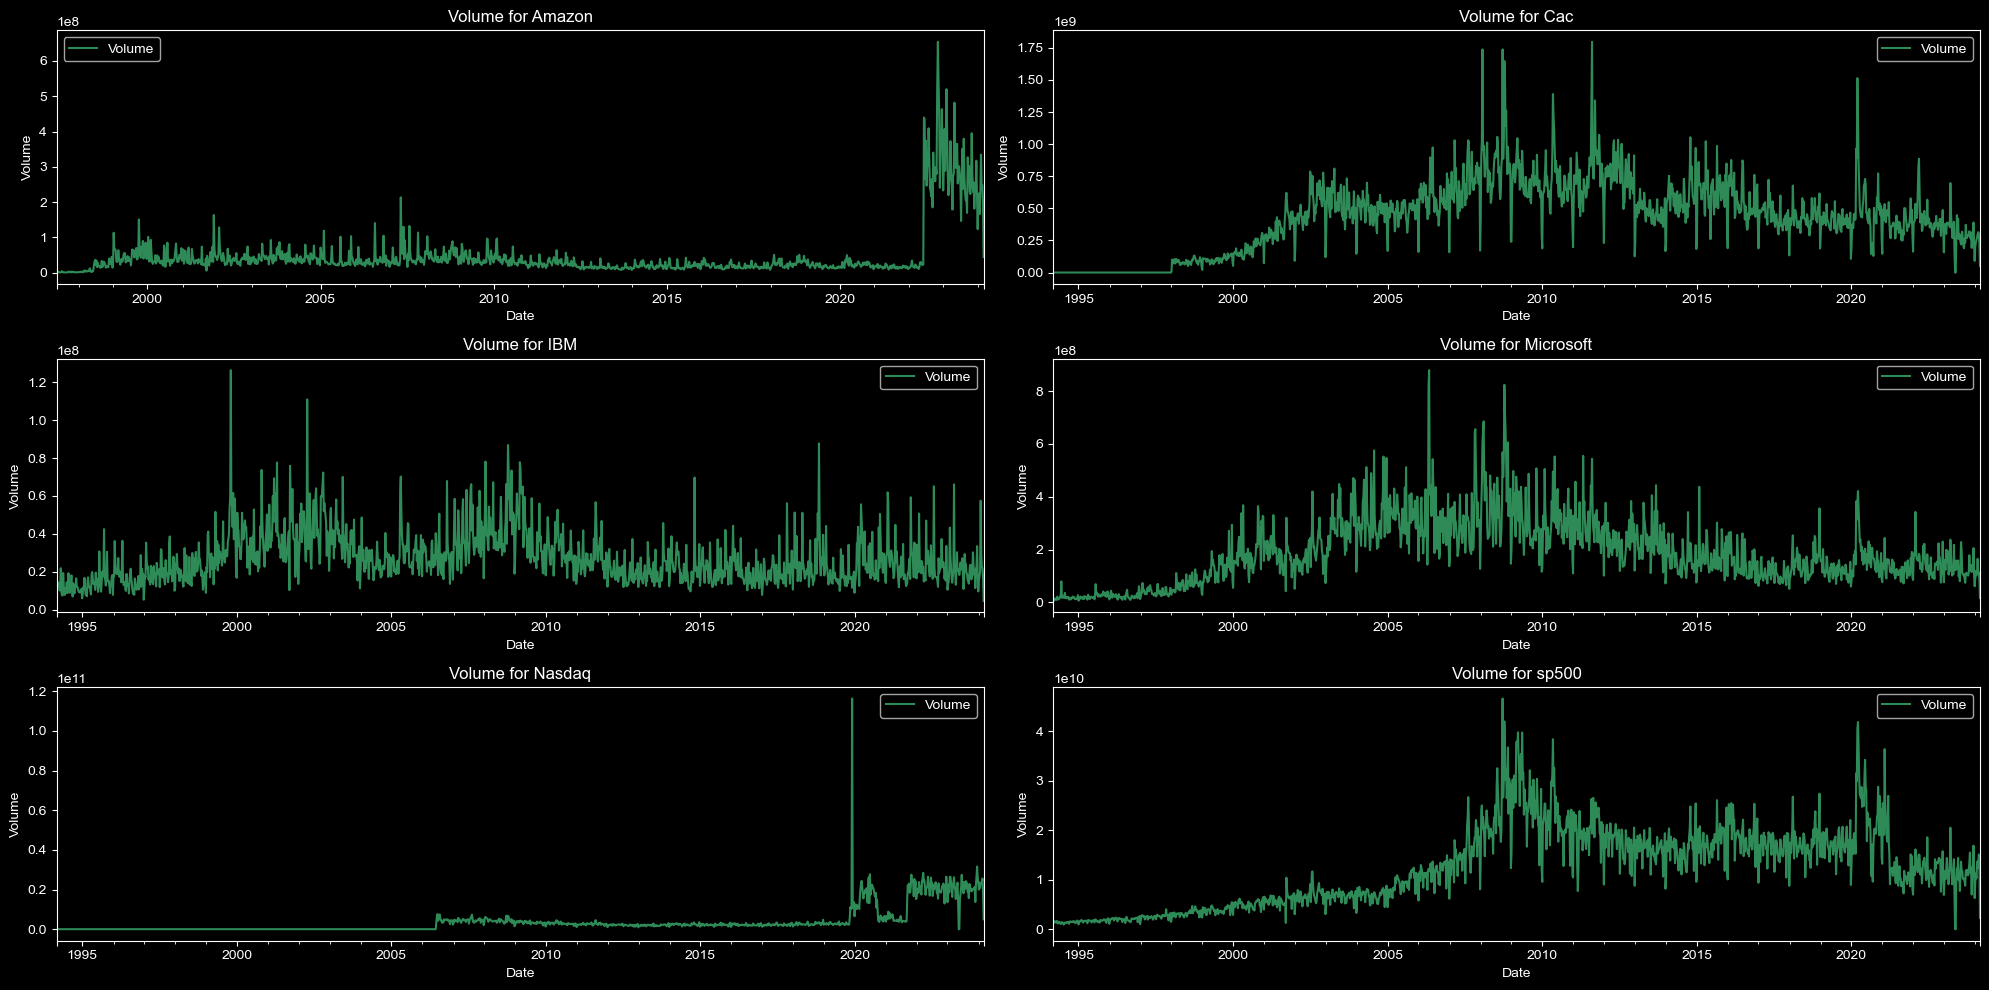

In [30]:
#volumes
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [31]:
#adjust the volume outlier for nasdaq
nasdaq_df.loc[nasdaq_df['Volume']==nasdaq_df.Volume.max(),'Volume'] = 11634422000

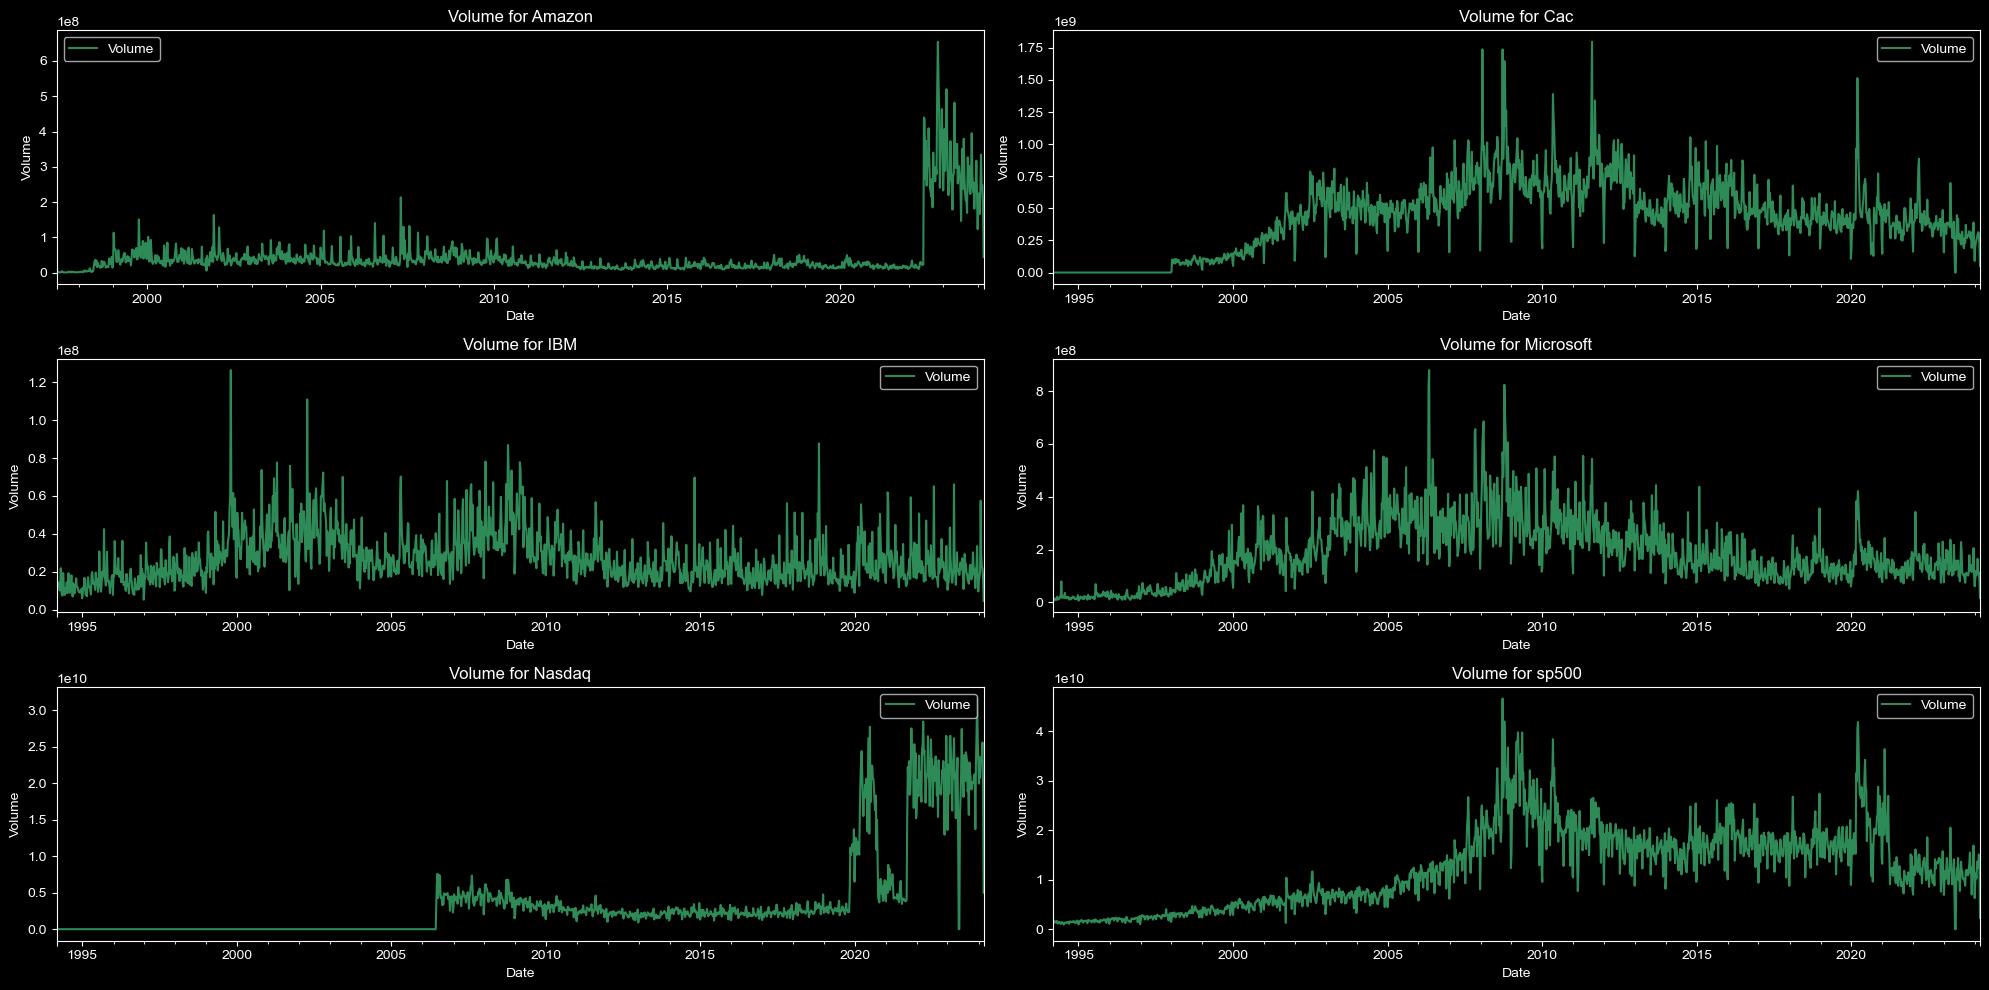

In [32]:
#volumes
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [33]:
#volume of nasdaq is not zero only from June 2006 on
nasdaq_df[nasdaq_df.Volume !=0].head()

Date     Open     High      Low    Close      Volume
641 2006-06-18  2137.47  2147.91  2065.11  2129.95  3590464523
642 2006-06-25  2136.60  2152.56  2103.77  2121.47  6356132033
643 2006-07-02  2126.46  2183.48  2090.78  2172.09  7589173242
644 2006-07-09  2177.91  2190.44  2126.64  2130.06  4263156577
645 2006-07-16  2135.96  2142.36  2027.11  2037.35  6692935710

In [34]:
#volume of cac is not zero only from January 1998 on
cac_df[cac_df.Volume !=0].head()

Date     Open     High      Low    Close       Volume
200 1998-01-04  2888.63  3048.00  2888.63  3040.14    6752690.0
201 1998-01-11  3023.43  3075.30  2902.13  2919.81  101046353.0
202 1998-01-18  2830.97  2976.85  2809.73  2976.09   78855452.0
203 1998-01-25  3004.86  3016.81  2944.29  2966.15   71560128.0
204 1998-02-01  2992.54  3173.98  2961.90  3172.14   86885992.0

Problem with Volumes:
- for nasdaq, it's 0 before 2006.
- for caa, it's 0 before 1998

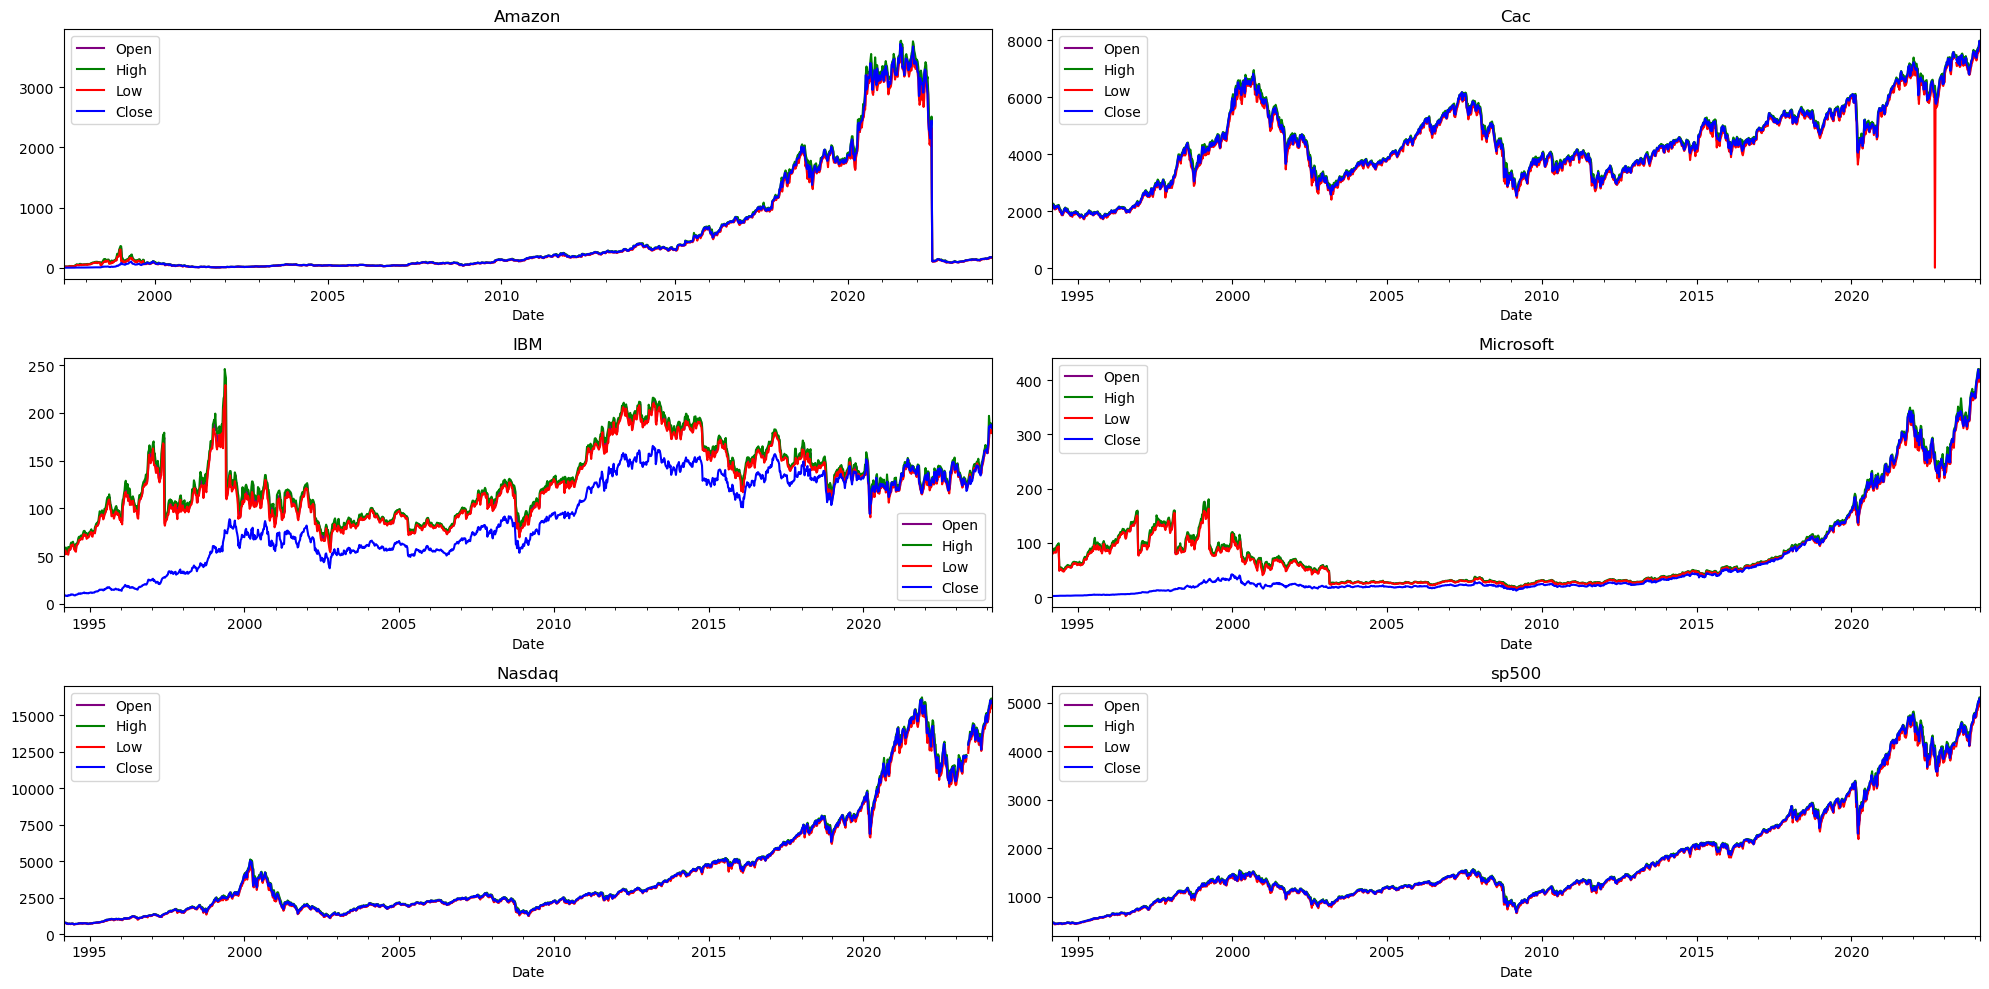

In [4]:
#prices: open, high, close, low BEFORE preprocessing
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

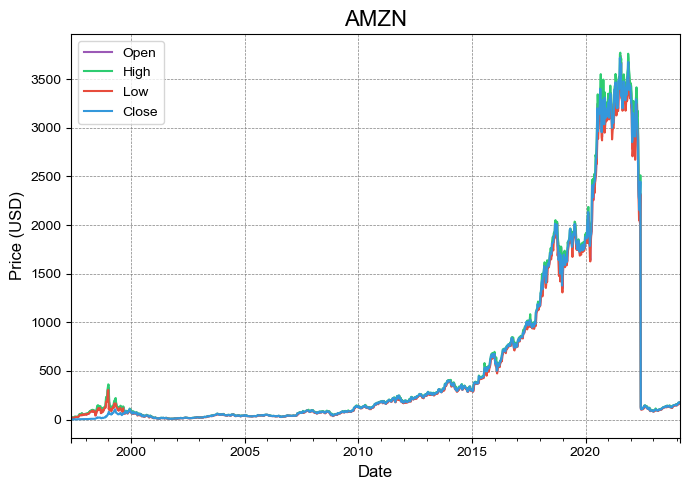

In [10]:
plt.rcParams['font.sans-serif'] = 'Arial'

fig, ax = plt.subplots(figsize=(7, 5))

# Plot data with lighter colors
amazon_df.plot(x='Date', y='Open', ax=ax, color='#9b59b6')  # Lighter blue for Open
amazon_df.plot(x='Date', y='High', ax=ax, color='#2ecc71')  # Lighter green for High
amazon_df.plot(x='Date', y='Low', ax=ax, color='#e74c3c')   # Lighter red for Low
amazon_df.plot(x='Date', y='Close', ax=ax, color='#3498db')  # Lighter purple for Close

ax.set_title('AMZN', fontsize=16, color='black')
ax.set_xlabel('Date', fontsize=12, color='black')
ax.set_ylabel('Price (USD)', fontsize=12, color='black')

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Add legend
ax.legend(['Open', 'High', 'Low', 'Close'], loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('amzn_before_preprocessing.png', transparent=True)
plt.show()

- Cac: on 2022-09-18 we had a problem with the 'Low'. We replace it from Yahoo finance.

In [12]:
#replacing the value for the lowest (nonsense) value for Cac on 2022-09-18
cac_df.loc[cac_df['Low']==cac_df['Low'].min(), 'Low'] = 6052.42

In [13]:
#fillna cac
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 7354.54
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 7523.56
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 7491.96
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 7443.38

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 7197.40
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 7493.38
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 7319.18
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 7467.93

In [14]:
#fillna nasdaq
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 12174.06
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 12364.65
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 12284.74
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 12231.68

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 12263.35
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 12731.73
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 12657.90
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 12301.17

In [15]:
#fillna sp500
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 4109.86
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 4212.91
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 4191.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 4126.65

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] =4103.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 4212.87
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 4205.45
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 4190.78

Amazon splits:
- 1998-06-02 2:1
- 1999-01-05 3:1
- 1999-09-05 2:1
- 2022-06-06 20:1

In [16]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1399 non-null   datetime64[ns]
 1   Open    1399 non-null   float64       
 2   High    1399 non-null   float64       
 3   Low     1399 non-null   float64       
 4   Close   1399 non-null   float64       
 5   Volume  1399 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 65.7 KB


In [17]:
amazon_df[(amazon_df['Date']<=pd.to_datetime('2022-06-14')) & (amazon_df['Date']>=pd.to_datetime('2022-05-28'))]

Date       Open     High      Low      Close     Volume
1306 2022-05-29  2169.2200  2303.74  2025.20  2302.9299   24434341
1307 2022-06-05  2325.6001  2512.20  2313.50  2447.0000   22763868
1308 2022-06-12   125.2450   128.99   109.05   109.6500  439648156

In [11]:
# adjust all past prices for the 2022-06-06 split
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]/20

# adjust problematic section where low is higher than close
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),['Open', 'High', 'Low']]/2
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),['Open', 'High', 'Low']]/3
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),['Open', 'High', 'Low']]/2

# adjust the volume before 2022-06-06 split
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),'Volume']*20

# assuming volumes were also incorrect for the periods where Open, High and Low were adjusted, we also adjust volumes
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),'Volume']*2
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),'Volume']*3
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),'Volume']*2

In [19]:
amazon_df[amazon_df['Close']<amazon_df['Low']]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [20]:
amazon_df[amazon_df['Close']>amazon_df['High']]
# This is fine, in 1999-08-15 close and high were exactly the same, this comes down to rounding

Date      Open      High       Low    Close      Volume
29  1997-12-07  0.211979  0.229688  0.206771  0.22969   212712000
117 1999-08-15  2.287500  2.435938  2.050000  2.43594  1716340000

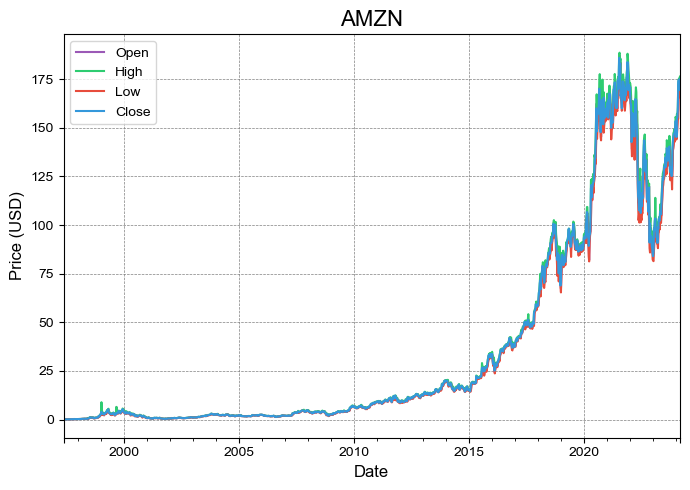

In [13]:
plt.rcParams['font.sans-serif'] = 'Arial'

fig, ax = plt.subplots(figsize=(7, 5))

# Plot data with lighter colors
amazon_df.plot(x='Date', y='Open', ax=ax, color='#9b59b6')  # Lighter blue for Open
amazon_df.plot(x='Date', y='High', ax=ax, color='#2ecc71')  # Lighter green for High
amazon_df.plot(x='Date', y='Low', ax=ax, color='#e74c3c')   # Lighter red for Low
amazon_df.plot(x='Date', y='Close', ax=ax, color='#3498db')  # Lighter purple for Close

ax.set_title('AMZN', fontsize=16, color='black')
ax.set_xlabel('Date', fontsize=12, color='black')
ax.set_ylabel('Price (USD)', fontsize=12, color='black')

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Add legend
ax.legend(['Open', 'High', 'Low', 'Close'], loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('amzn_after_preprocessing.png', transparent=True)
plt.show()

In [22]:
amazon_df.drop(columns=['Volume']).to_csv(path_or_buf='Amazon_weekly_ok.csv', sep=',', header=True, index=False)

All good with Amazon now.

IBM stock splits:
- 1964-05-18 2:1
- 1966-05-18 2:1
- 1968-05-23 2:1
- 1973-05-29 5:4
- 1979-05-21 4:1
- 1997-05-28 2:1
- 1999-05-27 2:1
- 2021-11-04 1046:1000


In [23]:
ibm_df_subset=ibm_df[ibm_df['Close']<ibm_df['Low']]
ibm_df_subset

Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    1994-03-13   53.000   56.250   51.375    8.5512  14884100
2    1994-03-20   56.125   58.375   55.875    8.7424  12402200
3    1994-03-27   56.875   58.875   53.625    8.2642  12237600
4    1994-04-03   54.375   55.000   52.000    8.3599  14114100
...         ...      ...      ...      ...       ...       ...
1543 2023-10-01  146.570  147.430  139.610  137.4734  23445500
1544 2023-10-08  140.040  142.940  139.860  139.1685  15932300
1545 2023-10-15  142.300  143.420  138.270  135.6704  16385600
1546 2023-10-22  139.280  140.620  136.310  134.3966  21043800
1557 2024-01-07  162.830  163.290  158.670  157.7221  15322500

[1370 rows x 6 columns]

In [24]:
ibm_df[(ibm_df['Date']>pd.to_datetime('1999-05-01')) & (ibm_df['Date']<pd.to_datetime('1999-06-27'))]

Date      Open      High       Low    Close    Volume
269 1999-05-02  204.7500  215.2500  202.3125  67.3741  35623600
270 1999-05-09  208.0000  217.5000  206.3125  70.0107  23481700
271 1999-05-16  217.2500  246.0000  215.5000  77.1004  36196600
272 1999-05-23  236.0000  240.6250  229.1875  74.2403  20666100
273 1999-05-30  230.3125  236.6250  112.6250  74.7641  34247700
274 1999-06-06  113.6250  116.0000  109.4375  74.7641  24534900
275 1999-06-13  118.1250  121.6875  112.5625  73.6765  28775600
276 1999-06-20  115.8750  122.0000  114.0000  77.8256  30580200

In [25]:
ibm_df[(ibm_df['Date']>pd.to_datetime('1997-05-01')) & (ibm_df['Date']<pd.to_datetime('1997-06-28'))]

Date     Open      High      Low    Close    Volume
165 1997-05-04  149.625  162.8750  149.125  25.7292  17726600
166 1997-05-11  162.875  169.2500  162.125  26.6465  16971200
167 1997-05-18  168.250  177.1250  168.125  27.0445  19115900
168 1997-05-25  169.875  177.3750  166.875  27.5817  12263000
169 1997-06-01  174.000  179.2500   84.500  27.5216  24707700
170 1997-06-08   87.750   87.8750   81.750  27.2437  21034800
171 1997-06-15   86.000   89.7500   85.500  28.3172  18614500
172 1997-06-22   88.750   91.9375   88.250  28.5957  19400900

In [26]:
ibm_df_subset.tail(50)

Date    Open      High      Low       Close    Volume
1322 2019-07-07  139.60  141.8200  139.280  134.881564   9862722
1323 2019-07-14  141.05  142.9200  139.130  136.179053  13194248
1325 2019-07-28  150.16  151.9400  148.380  144.402840  16794485
1326 2019-08-04  151.11  152.9500  145.590  140.481754  22876887
1327 2019-08-11  144.98  145.1000  135.350  131.374619  28623442
1328 2019-08-18  135.66  136.5700  130.250  129.087409  20933133
1329 2019-08-25  134.88  136.3300  128.830  125.043777  16504912
1332 2019-09-15  140.59  145.4600  140.460  138.651227  17776693
1333 2019-09-22  142.56  145.0300  140.510  136.923756  15262993
1334 2019-09-29  141.19  145.0900  140.558  138.236248  12376163
1335 2019-10-06  143.73  147.3500  139.180  137.994981  15911420
1336 2019-10-13  142.26  144.5000  138.250  137.773015  14096608
1337 2019-10-20  142.31  143.7200  132.250  129.405882  34208011
1338 2019-10-27  132.61  135.9300  130.900  130.708722  19388201
1339 2019-11-03  136.00  136.6300  133.200  130.795579  16136475
1340 2019-11-10  136.24  139.1350  136.160  134.365419  17174941
1341 2019-11-17  137.20  137.2000  133.330  131.231105  16169172
1342 2019-11-24  134.30  135.3800  132.750  131.172520  16963107
1343 2019-12-01  134.47  136.1500  133.030  131.279926  11502959
1344 2019-12-08  134.45  134.5000  130.689  130.078927  17337693
1345 2019-12-15  133.35  135.6604  133.260  131.045585  17504239
1346 2019-12-22  134.94  136.4200  133.460  132.393047  20036502
1347 2019-12-29  135.78  136.1500  134.610  132.080592   8887084
1348 2020-01-05  135.20  135.9200  132.400  131.172520  13418364
1350 2020-01-19  135.48  138.3300  135.070  135.048915  20831539
1351 2020-01-26  137.81  145.7900  137.600  137.245864  34829367
1354 2020-02-16  152.97  155.6000  149.770  148.700643  23423757
1355 2020-02-23  149.79  151.8900  148.840  147.852053  12493166
1359 2020-03-22   98.00  107.4100   94.710   94.124448  47138046
1365 2020-05-03  125.56  129.3100  121.390  120.253134  26502989
1522 2023-05-07  126.35  126.7500  121.760  118.169100  21163500
1523 2023-05-14  123.76  123.9200  120.550  118.995700  20400000
1525 2023-05-28  127.50  129.6600  125.010  124.856400  21030100
1527 2023-06-11  133.12  136.1000  131.880  131.065800  21173500
1528 2023-06-18  136.00  139.4700  135.820  133.177600  24222400
1529 2023-06-25  136.36  137.2300  129.180  125.379500  27110100
1531 2023-07-09  133.42  134.3500  131.550  127.946600  10922300
1532 2023-07-16  131.76  135.3300  131.700  129.225300  15108700
1535 2023-08-06  143.81  146.0900  142.170  139.726000  24068200
1536 2023-08-13  145.00  146.5000  142.210  140.236500  19428000
1537 2023-08-20  143.05  143.3700  139.760  138.561000  18825100
1539 2023-09-03  145.41  148.1000  145.210  144.959400  15198000
1540 2023-09-10  147.91  149.0000  147.120  144.704700  13719200
1541 2023-09-17  148.57  148.7800  145.530  143.048700  19313600
1542 2023-09-24  145.77  151.9300  144.660  143.950200  23592500
1543 2023-10-01  146.57  147.4300  139.610  137.473400  23445500
1544 2023-10-08  140.04  142.9400  139.860  139.168500  15932300
1545 2023-10-15  142.30  143.4200  138.270  135.670400  16385600
1546 2023-10-22  139.28  140.6200  136.310  134.396600  21043800
1557 2024-01-07  162.83  163.2900  158.670  157.722100  15322500

In [27]:
ibm_df[(ibm_df['Date']>pd.to_datetime('2023-12-01')) & (ibm_df['Date']<pd.to_datetime('2024-01-20'))]

Date    Open    High     Low     Close    Volume
1552 2023-12-03  154.99  160.59  154.75  159.0995  21899800
1553 2023-12-10  160.29  162.79  159.97  160.4968  22117500
1554 2023-12-17  162.68  166.34  160.15  160.7643  33504000
1555 2023-12-24  162.23  163.33  159.53  160.6751  17732400
1556 2023-12-31  162.23  164.18  162.05  162.0724   9603900
1557 2024-01-07  162.83  163.29  158.67  157.7221  15322500
1558 2024-01-14  158.69  165.98  157.89  164.3021  17641300

In [28]:
ibm_df[(ibm_df['Date']>pd.to_datetime('2023-12-20')) & (ibm_df['Date']<pd.to_datetime('2024-01-20'))]

Date    Open    High     Low     Close    Volume
1555 2023-12-24  162.23  163.33  159.53  160.6751  17732400
1556 2023-12-31  162.23  164.18  162.05  162.0724   9603900
1557 2024-01-07  162.83  163.29  158.67  157.7221  15322500
1558 2024-01-14  158.69  165.98  157.89  164.3021  17641300

In [29]:
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]/1.046

# adjust for the 1999-05-27 split, plus the Open and High at 1999-05-30, which are an anomaly in the dataset
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]/2
ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]=ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]/2

# adjust for the 1997-05-28 split, plus the Open and High at 1997-06-01, which are an anomaly in the dataset
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]/2
ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]=ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]/2

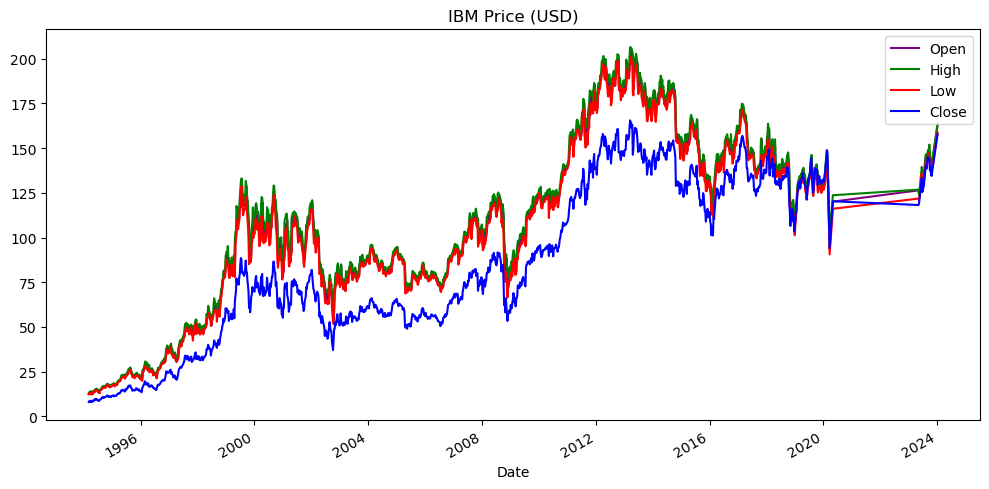

In [30]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df_subset.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df_subset.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df_subset.plot(x='Date', y='Low', ax=ax, color = 'red')
ibm_df_subset.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [31]:
#prices AFTER the cleaning of the Close prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [32]:
#investigate missing values for the datasets
for name, df in zip(dfs_names, dfs):
    missing_rows = df[df.isna().any(axis=1)]
    if not missing_rows.empty:
        print(f"DataFrame: {name}")
        print(missing_rows)

#for df in dfs:
    #df.dropna(inplace=True)

Close<Low:
- Data recording errors: Errors might have occurred during the process of recording or entering the data, leading to inconsistencies.
- Data adjustments: Sometimes, historical data might be adjusted to account for corporate actions such as stock splits, dividends, or other factors. If not handled properly, these adjustments could lead to inconsistencies.
- Data processing issues: Errors might occur during data processing, such as merging or joining datasets, which could result in incorrect values being assigned.

In [33]:
#cases in which I have that Close<Low:
for df, name in zip(dfs, dfs_names):
    print(name, df[df['Close']<df['Low']])

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM            Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    1994-03-13   53.000   56.250   51.375    8.5512  14884100
2    1994-03-20   56.125   58.375   55.875    8.7424  12402200
3    1994-03-27   56.875   58.875   53.625    8.2642  12237600
4    1994-04-03   54.375   55.000   52.000    8.3599  14114100
...         ...      ...      ...      ...       ...       ...
1543 2023-10-01  146.570  147.430  139.610  137.4734  23445500
1544 2023-10-08  140.040  142.940  139.860  139.1685  15932300
1545 2023-10-15  142.300  143.420  138.270  135.6704  16385600
1546 2023-10-22  139.280  140.620  136.310  134.3966  21043800
1557 2024-01-07  162.830  163.290  158.670  157.7221  15322500

[1370 rows x 6 columns]
Microsoft            Date    Open    High     Low       

SUM UP for Close<Low:
- Amazon: we have 120 rows between '97 and '99
- Cac: no case
- IBM: 1370 cases from 1994 to 2024
- Microsoft: 1285 cases from 1994 to 2023
- Nasdaq: no case
- sp500: no case

In [34]:
#Check for duplicates
for df, name in zip(dfs, dfs_names):
    duplicates = df[df.duplicated()]
    print(name, duplicates)

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Microsoft Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Nasdaq Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
sp500 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


Outliers?

In [35]:
cac_df.drop(columns=['Volume']).to_csv(path_or_buf='Cac_weekly_ok.csv', sep=',', header=True, index=False)
nasdaq_df.drop(columns=['Volume']).to_csv(path_or_buf='Nasdaq_weekly_ok.csv', sep=',', header=True, index=False)
sp500_df.drop(columns=['Volume']).to_csv(path_or_buf='Sp500_weekly_ok.csv', sep=',', header=True, index=False)

## PREPROCESSING

In [32]:
from sklearn.preprocessing import StandardScaler

#scaler
scaler = StandardScaler()

#standardization of the prices
for df in dfs:
    df[['Close', 'Open', 'Low', 'High']] = scaler.fit_transform(df[['Close', 'Open', 'Low', 'High']])

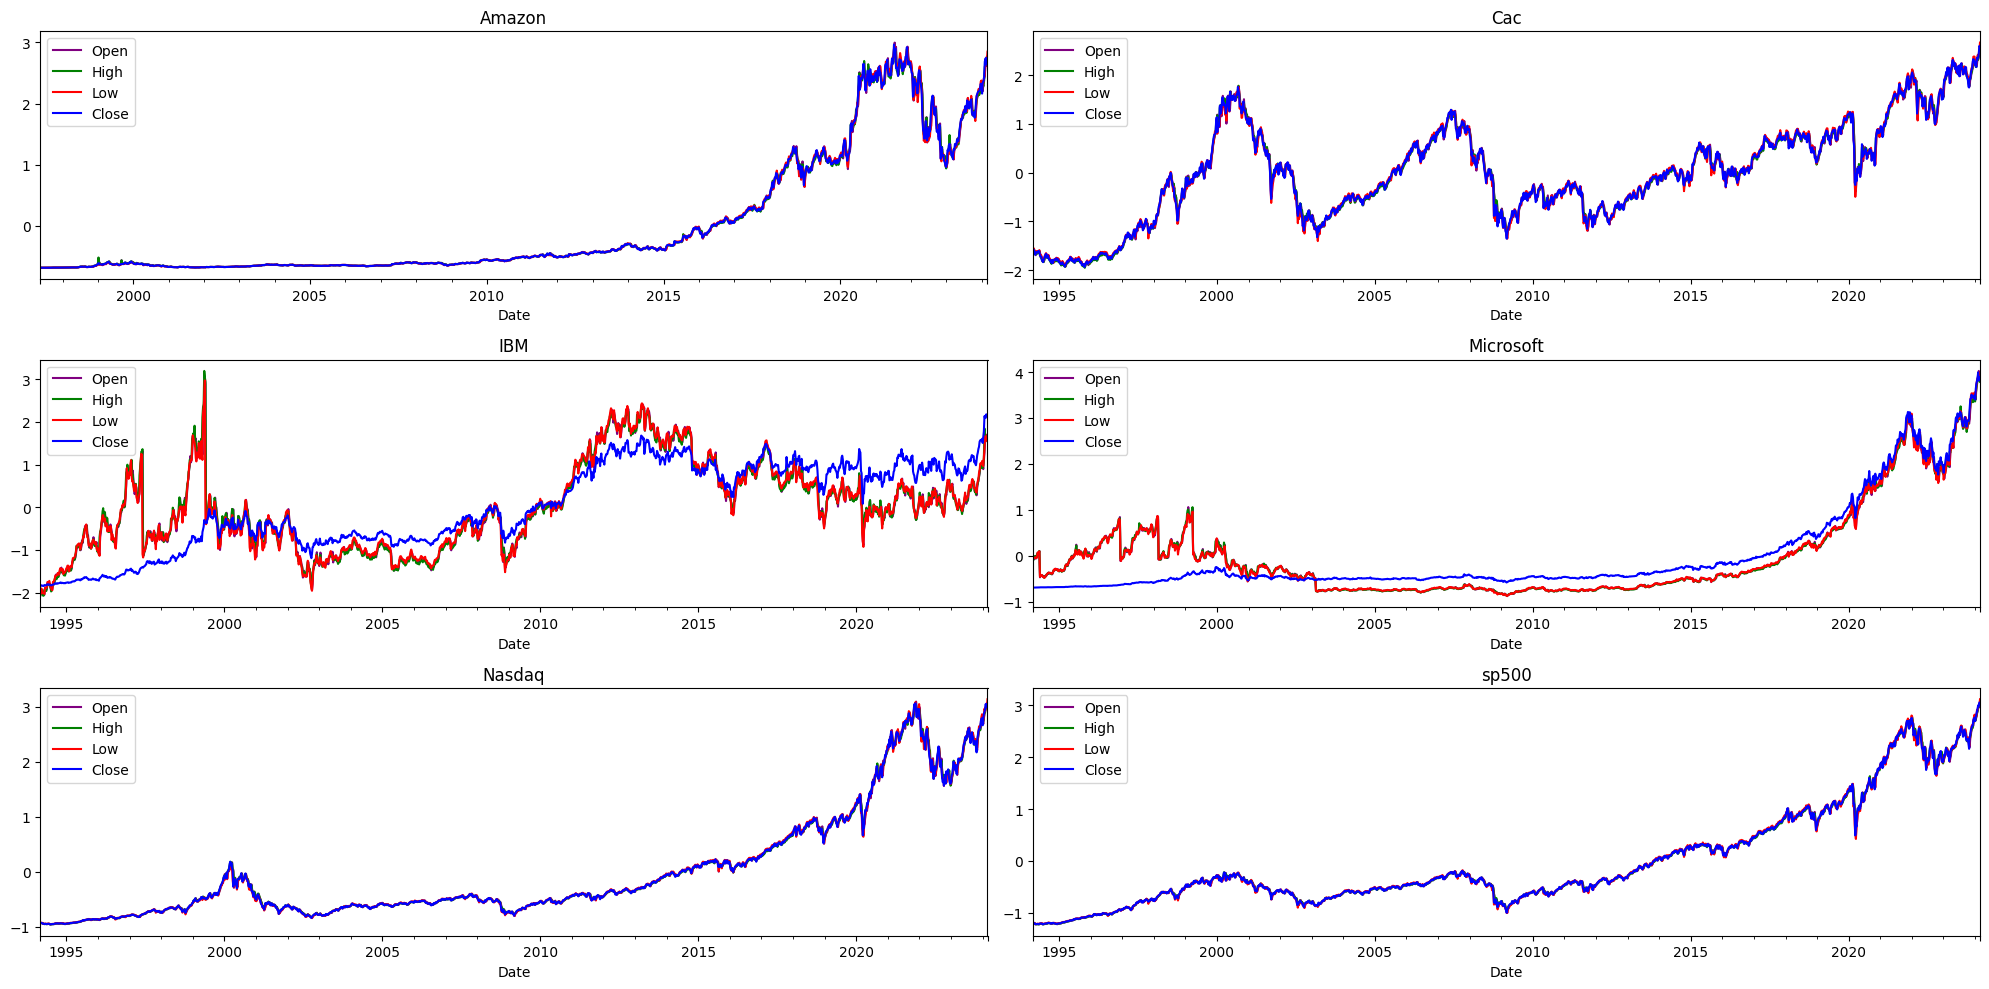

In [33]:
#plots with standardized prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [34]:
from sklearn.preprocessing import MinMaxScaler

#scaler
scaler = MinMaxScaler()

#standardization of the prices
for df in dfs:
    df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])

#question: is it better to use RobustScaler to transform the volume? Take a look at it and try whether the performance is then getting better.

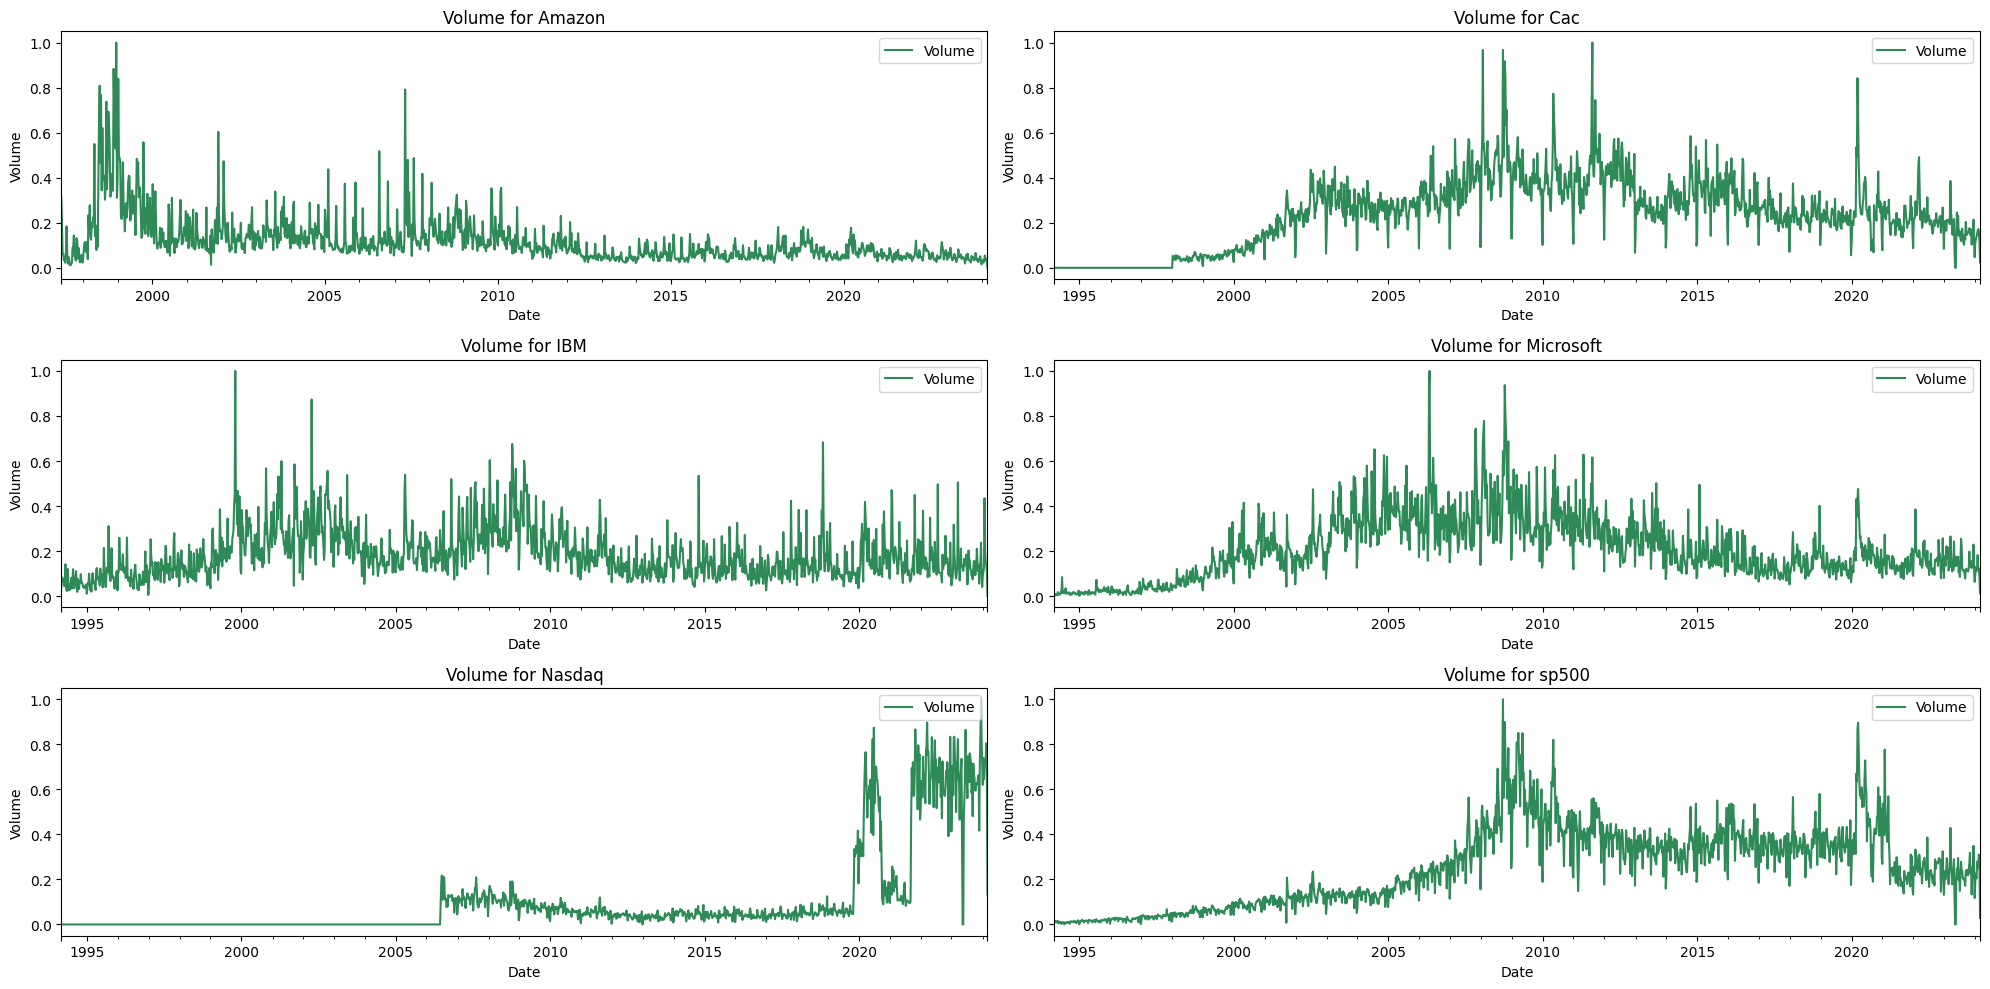

In [35]:
#volume after the scaling
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')
plt.tight_layout()
plt.show()

## ARIMA

- _AR(p) and MA(q)_

AR(p) and MA(q): these two methods are used to check how the stationarity is dependent on past errors or on past data respectively. In both case, the dependence is considered to be in additive way. The names clarify the two approaches: Moving Average and Autoregression; q is the number of the past errors the future data is depending upon, while p is the same but which past data.

- _ACF plots and ACF function_

Precondition: both ACF and PACF assume stationarity of the underlyinh time series.
Autocorrelation: correlation between a time series with a lagged version of itself. The ACF starts with a lag at 0, which is the correlation of the time series with itself t(therefore results in a correlation of 1).

https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c#:~:text=in%20your%20browser.-,Autocorrelation%20Function%20(ACF),plot_acf%20function%20from%20the%20statsmodels.

Autocorrelation analysis helps detect pattern and check for randomness. It's very important when using ARMA model because it backs the finding of the parameters. ACF is giving you similarity, so it doesn't provide you any insight for a good estimation of p.
But, ACF is useful when it comes to work with MA(q). The ACF plot can tell things like the observed time series is white noise/random.
So, we have to move to PACF for p, which is a conditional correlation.The order is the dirrefence between the indexes of times (e.g.: it's 2 for t_1, t_3). If you calculate the PACF function of AR(p), it will be 0 after time lag = p. The cutting off of PACF(h) after p lags is the AR’s signature (p) model.

!!check parameter method = 'ols'

- _ARMa(p,q)_

It's a combination of the two model, and it's used to model stationary nonseasonal time series data. To select the best model, we compute the BIC for all the three and select the one which has the lowest value. To get the best parameters, we should compute AIC or BIC over a subset of p,q.

- _ARIMA(d,p,q)_

Change data into stationary data by transformation and differencing. (I)
Apply AR and MA models to estimate the dependence structure of the differenced time series and predict.
That’s AR + I + MA = ARIMA for you.

- _lollipop plots_

The blue area you see in ACF and PACF plots is the confidence interval and is an indicator of the significance threshold. TO DETERMINE THE ORDER OF THE MODEL: how many lollipopos are above/below the confidence interval before the next lollipop enters the blue area?


In [ ]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, min_periods=1).mean()
    return macd, signal_line

In [ ]:
for df in dfs:
    # Calculate moving averages (e.g., 10-day and 50-day)
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA40'] = df['Close'].rolling(window=40).mean()
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    df['RSI'] = calculate_rsi(df)

In [ ]:
#Augmented Dickey-Fuller (ADF) test on each time series provided in the dfs list.
#The ADF test is a statistical test used to determine whether a unit root is present in a time series dataset.
#A unit root indicates that the series is non-stationary, meaning it has a trend or seasonality that needs to be removed for accurate analysis.

from statsmodels.tsa.stattools import adfuller

#  Define a function adf_check that takes a time series as input and performs the ADF test on it.
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Number of Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        #Checks if the p-value from the ADF test is less than or equal to 0.05, which is a common significance level.
        #If so, it indicates evidence against the null hypothesis of a unit root being present.
        print(f"Reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        #If the p-value is greater than 0.05, the null hypothesis cannot be rejected.
        print(f"Fail to reject the null hypothesis. Time series has a unit root, indicating it is non-stationary.")

In [ ]:
#check: close and volume don't have inf values
for df in dfs:
    inf_close = np.isinf(df['Close']).any()
    inf_volume = np.isinf(df['Volume']).any()
    print(inf_close, inf_volume)

False False
False False
False False
False False
False False
False False


In [ ]:
#check: close and volume don't have nan
for df in dfs:
    nan_close = (df['Close']).isna().sum()
    nan_volume = (df['Volume']).isna().sum()
    print(nan_close, nan_volume)


0 0
0 0
0 0
0 0
0 0
0 0


Reference for parameters selection:
https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

In [ ]:
#split train and test
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
from pandas import DateOffset
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

The ARIMA model aims to capture the temporal dependencies and patterns in the time series data, making it suitable for forecasting future values.

Working Principles:
- Identifying Stationarity: ARIMA models require the time series data to be stationary. Stationarity implies that the statistical properties of the time series (like mean and variance) remain constant over time.
- Parameter Estimation: Estimating the parameters p, d, and q involves analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the time series data. ACF helps determine the MA order (q), while PACF aids in determining the AR order (p).
- Model Fitting: Once the parameters are determined, the ARIMA model is fitted to the data. This involves minimizing the error (often using methods like maximum likelihood estimation) to obtain the most suitable coefficients for the autoregressive and moving average terms.
- Forecasting: After fitting the model, it can be used to forecast future values by iterating over time.

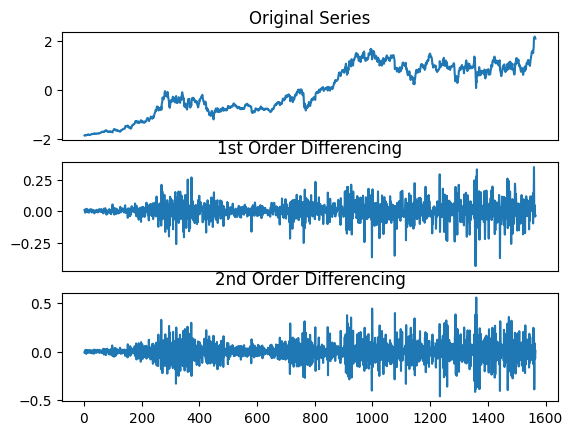

In [ ]:
#selection of d parameter for IBM
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(ibm_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(ibm_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(ibm_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

In [ ]:
#correzione esponenziale di ibm con il logaritmo
ibm_df['Log Close'] = np.log(ibm_df['Close']+2)

ibm_df['Log Close First Difference'] = ibm_df['Log Close']- ibm_df['Log Close'].shift(1)
adf_check(ibm_df['Log Close First Difference'].dropna())

ibm_df['Log Close Second Difference'] = ibm_df['Log Close First Difference']- ibm_df['Log Close First Difference'].shift(1)
adf_check(ibm_df['Log Close Second Difference'].dropna())

ibm_df['Log Seasonal Difference'] = ibm_df['Log Close'] - ibm_df['Log Close'].shift(52)
adf_check(ibm_df['Log Seasonal Difference'].dropna())

ibm_df['Seasonal First Difference'] = ibm_df['Log Close First Difference'] - ibm_df['Log Close First Difference'].shift(54)
adf_check(ibm_df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -19.40464320435571
p-value : 0.0
#Number of Lags Used : 4
Number of Observations Used : 1560
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.582122914456862
p-value : 4.45116983336071e-27
#Number of Lags Used : 22
Number of Observations Used : 1541
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.0129866769543945
p-value : 0.0013440152089552666
#Number of Lags Used : 19
Number of Observations Used : 1494
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -11.120347941767829
p-value : 3.4785533473702665e-20
#Number of Lags Used : 18
Number of Observations Used : 1492
Reject the null hypothesis. Data has no unit root and is stationary.


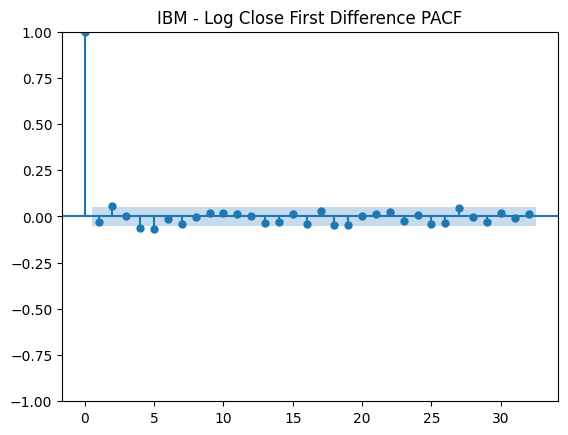

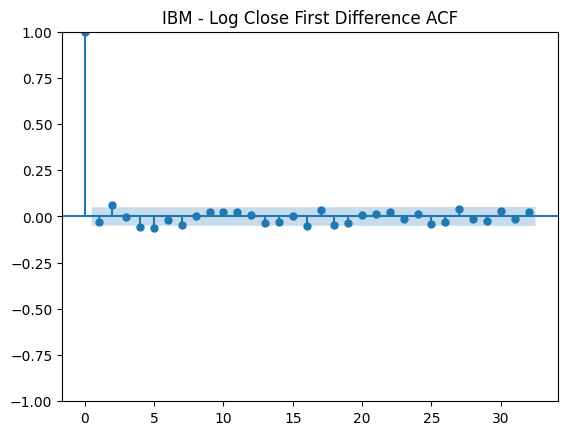

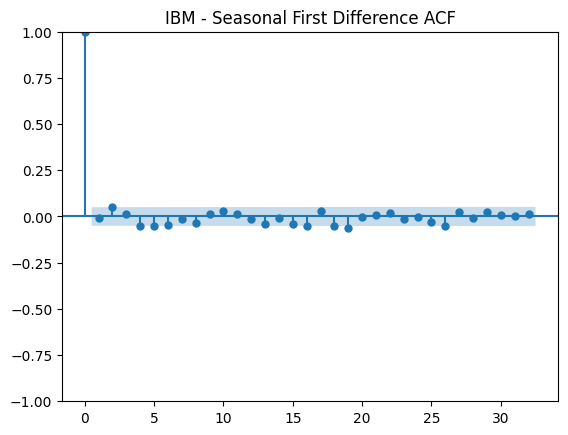

In [ ]:
#selection of p and q for IBM
fig_first = plot_pacf(ibm_df['Log Close First Difference'].dropna(), title='IBM - Log Close First Difference PACF')
second_first = plot_acf(ibm_df['Log Close First Difference'].dropna(), title='IBM - Log Close First Difference ACF')

    # Seasonal First Difference
fig_seasonal_first = plot_acf(ibm_df["Seasonal First Difference"].dropna(), title='IBM - Seasonal First Difference ACF')


In [ ]:
train_size_ibm = int(len(ibm_df) * 0.8)  # 80% for training
ibm_train, ibm_test = ibm_df[:train_size_ibm], ibm_df[train_size_ibm:]
ibm_test.set_index('Date', inplace=True)
ibm_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Log Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood                2306.666
Date:                Fri, 12 Apr 2024   AIC                          -4605.333
Time:                        07:46:23   BIC                          -4584.809
Sample:                    03-06-1994   HQIC                         -4597.617
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0425      0.024     -1.809      0.070      -0.089       0.004
ar.L2          0.0465      0.024      1.931      0.053      -0.001       0.094
ma.L1         -0.9965      0.003   -321.115      0.0

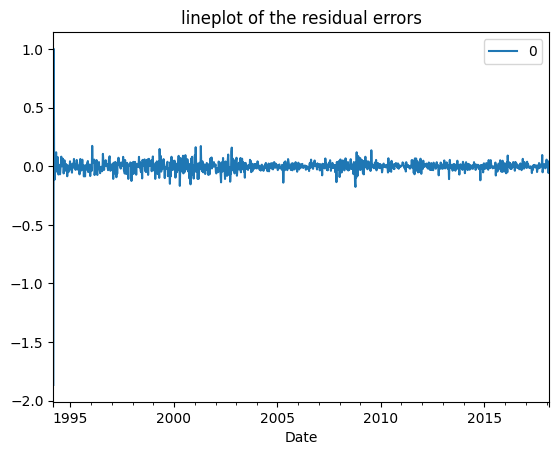

                 0
count  1252.000000
mean     -0.002345
std       0.071034
min      -1.866031
25%      -0.019882
50%      -0.000079
75%       0.017991
max       1.002528


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-37-11e930f79c84>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm_test['forecast'] = fc


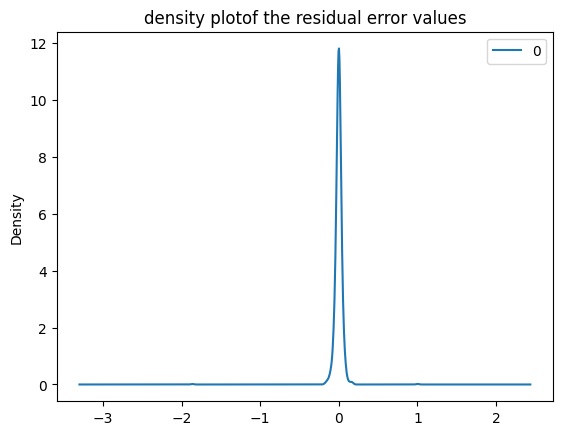

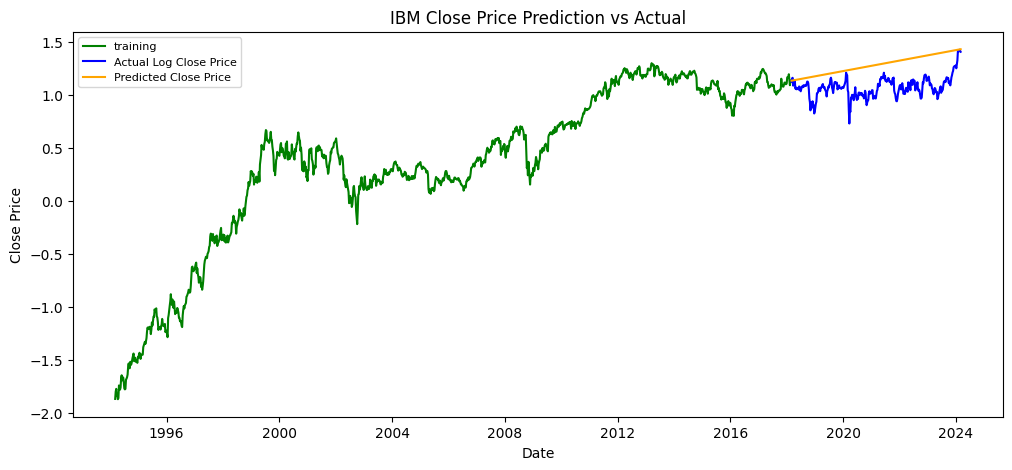

MSE: 0.05426096338900288
MAE: 0.05426096338900288
RMSE: 0.23293982782899725
MAPE: 0.20258230604998562


In [ ]:
#IBM
model = ARIMA(ibm_train['Log Close'], order=(2,2,1))
results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() # suggesting that they still be some trend information not captured by the model?
plt.title('lineplot of the residual errors')
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())
ibm_test.shape

#forecast
fc = results.forecast(314, alpha=0.05)
ibm_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ibm_train['Log Close'], color='green',label='training')
plt.plot(ibm_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(ibm_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('IBM Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=ibm_test.index, y=ibm_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=ibm_test.index, y=ibm_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for IBM',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(ibm_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(ibm_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(ibm_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-ibm_test['Log Close'])/np.abs(ibm_test['Log Close']))
print('MAPE: '+str(mape))

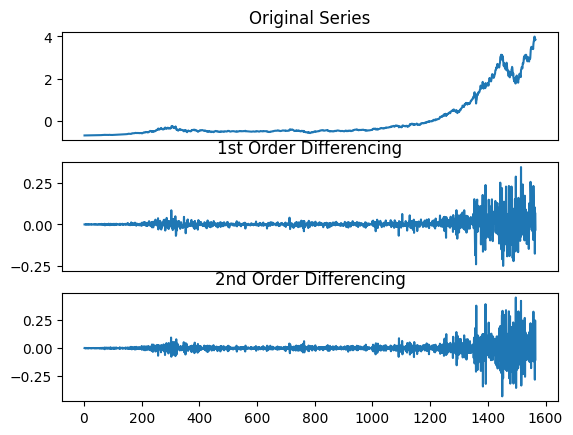

In [ ]:
#selection of d parameter for Microsoft
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(microsoft_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(microsoft_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(microsoft_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

In [ ]:
#correzione esponenziale di microsoft con il logaritmo
microsoft_df['Log Close'] = np.log(microsoft_df['Close']+1)

microsoft_df['Log Close First Difference'] = microsoft_df['Log Close']- microsoft_df['Log Close'].shift(1)
adf_check(microsoft_df['Log Close First Difference'].dropna())

microsoft_df['Log Close Second Difference'] = microsoft_df['Log Close First Difference']- microsoft_df['Log Close First Difference'].shift(1)
adf_check(microsoft_df['Log Close Second Difference'].dropna())

microsoft_df['Log Seasonal Difference'] = microsoft_df['Log Close'] - microsoft_df['Log Close'].shift(52)
adf_check(microsoft_df['Log Seasonal Difference'].dropna())

microsoft_df['Seasonal First Difference'] = microsoft_df['Log Close First Difference'] - microsoft_df['Log Close First Difference'].shift(54)
adf_check(microsoft_df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -19.607609551714667
p-value : 0.0
#Number of Lags Used : 4
Number of Observations Used : 1560
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.65069881557587
p-value : 3.504297093085465e-27
#Number of Lags Used : 23
Number of Observations Used : 1540
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.5504075396536465
p-value : 0.006783055822138592
#Number of Lags Used : 14
Number of Observations Used : 1499
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -17.971096554079182
p-value : 2.7954984181974146e-30
#Number of Lags Used : 5
Number of Observations Used : 1505
Reject the null hypothesis. Data has no unit root and is stationary.


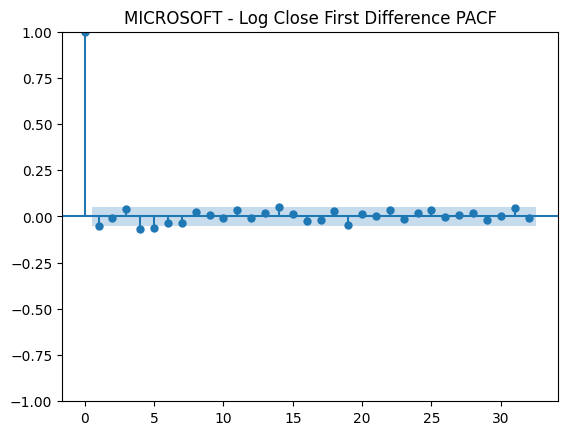

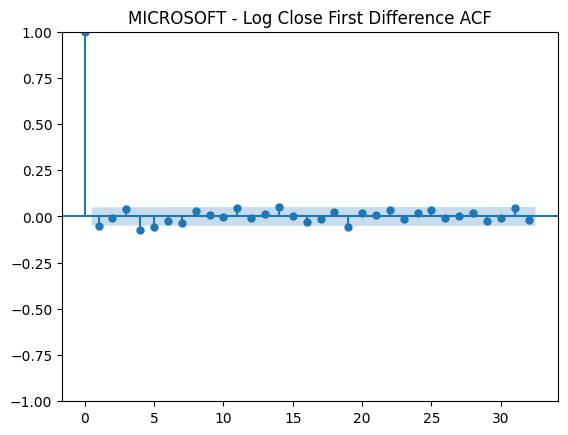

In [ ]:
#indagine di p e q per microsoft
fig_first = plot_pacf(microsoft_df['Log Close First Difference'].dropna(), title='MICROSOFT - Log Close First Difference PACF')
second_first = plot_acf(microsoft_df['Log Close First Difference'].dropna(), title='MICROSOFT - Log Close First Difference ACF')
#fig_seasonal_first = plot_acf()

In [ ]:
train_size_microsoft = int(len(microsoft_df) * 0.8)
microsoft_train, microsoft_test = microsoft_df[:train_size_microsoft], microsoft_df[train_size_microsoft:]

microsoft_test.set_index('Date', inplace=True)
microsoft_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:              Log Close   No. Observations:                 1252
Model:                 ARIMA(1, 2, 1)   Log Likelihood                3196.088
Date:                Fri, 12 Apr 2024   AIC                          -6386.176
Time:                        07:46:30   BIC                          -6370.783
Sample:                    03-06-1994   HQIC                         -6380.389
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0196      0.019     -1.018      0.308      -0.057       0.018
ma.L1         -0.9964      0.004   -251.319      0.000      -1.004      -0.989
sigma2         0.0004   7.35e-06     47.711      0.0

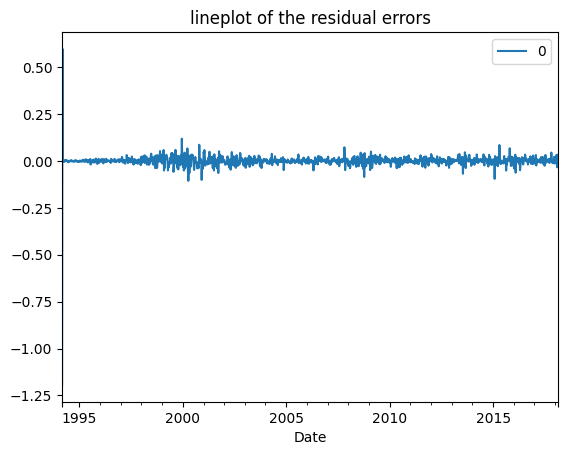

                 0
count  1252.000000
mean     -0.000268
std       0.042131
min      -1.193749
25%      -0.008137
50%       0.000104
75%       0.009482
max       0.597485


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-42-e5e8ebacc791>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



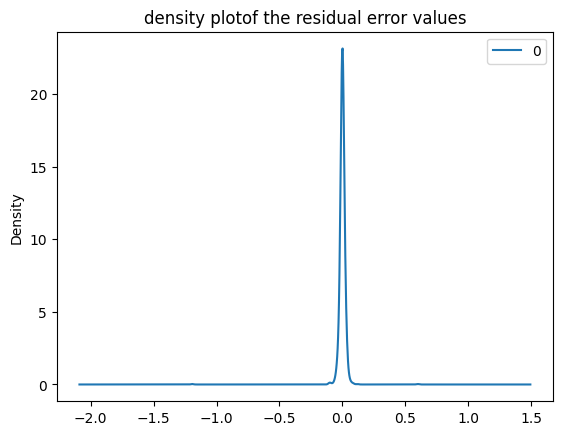

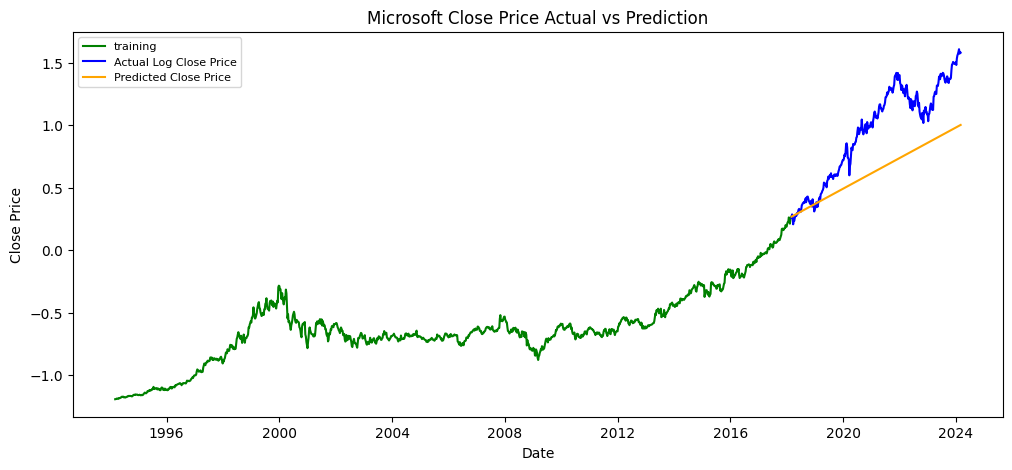

MSE: 0.13756535879208706
MAE: 0.13756535879208706
RMSE: 0.37089804366171447
MAPE: 0.2968507022202859


In [ ]:
#MICROSOFT
model = ARIMA(microsoft_train['Log Close'], order=(1,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())
# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('lineplot of the residual errors')
#suggesting that they still be some trend information not captured by the model
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())

#forecast
fc = results.forecast(314, alpha=0.05)
microsoft_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(microsoft_train['Log Close'], color='green',label='training')
plt.plot(microsoft_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(microsoft_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('Microsoft Close Price Actual vs Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=microsoft_test.index, y=microsoft_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=microsoft_test.index, y=microsoft_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Microsoft',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(microsoft_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(microsoft_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(microsoft_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-microsoft_test['Log Close'])/np.abs(microsoft_test['Log Close']))
print('MAPE: '+str(mape))

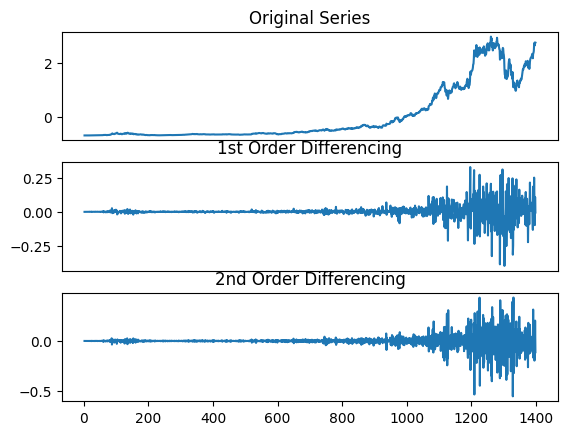

In [ ]:
#selection of d parameter for Amazon
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(amazon_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(amazon_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(amazon_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.887445126232049
p-value : 2.978508495603287e-07
#Number of Lags Used : 24
Number of Observations Used : 1373
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.535437666999377
p-value : 5.2484806398464595e-27
#Number of Lags Used : 23
Number of Observations Used : 1373
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0188456687285066
p-value : 0.03317154085900348
#Number of Lags Used : 17
Number of Observations Used : 1329
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.015186348708974
p-value : 1.539715027773931e-07
#Number of Lags Used : 23
Number of Observations Used : 1320
Reject the null hypothesis. Data has no unit root and is stationary.


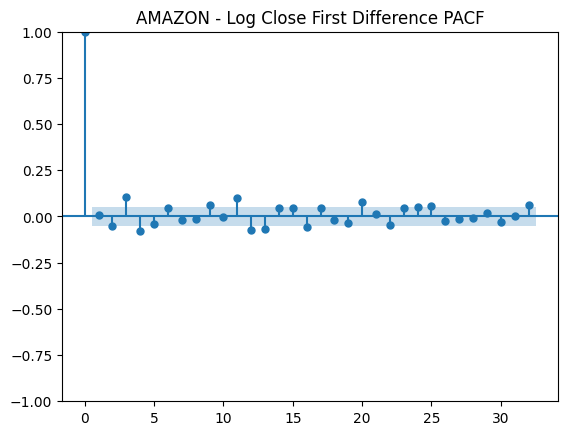

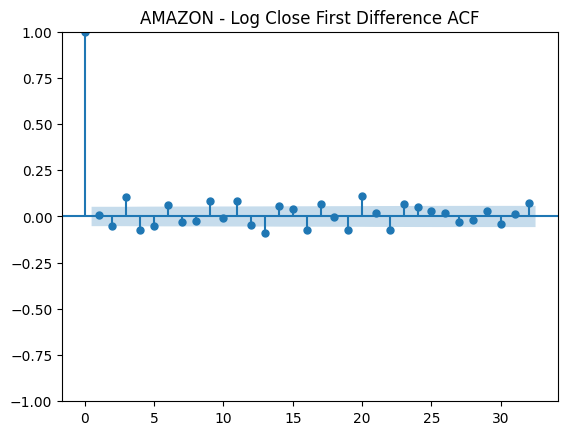

In [ ]:
#correzione esponenziale di amazon con il logaritmo
amazon_df['Log Close'] = np.log(amazon_df['Close']+2)

#indagine di d, p e q per amazon

amazon_df['Log Close First Difference'] = amazon_df['Log Close']- amazon_df['Log Close'].shift(1)
adf_check(amazon_df['Log Close First Difference'].dropna())

amazon_df['Log Close Second Difference'] = amazon_df['Log Close First Difference']- amazon_df['Log Close First Difference'].shift(1)
adf_check(amazon_df['Log Close Second Difference'].dropna())

amazon_df['Log Seasonal Difference'] = amazon_df['Log Close'] - amazon_df['Log Close'].shift(52)
adf_check(amazon_df['Log Seasonal Difference'].dropna())

amazon_df['Seasonal First Difference'] = amazon_df['Log Close First Difference'] - amazon_df['Log Close First Difference'].shift(54)
adf_check(amazon_df['Seasonal First Difference'].dropna())


fig_first = plot_pacf(amazon_df['Log Close First Difference'].dropna(), title='AMAZON - Log Close First Difference PACF')
second_first = plot_acf(amazon_df['Log Close First Difference'].dropna(), title='AMAZON - Log Close First Difference ACF')


In [ ]:
train_size_amazon = int(len(amazon_df) * 0.8)  # 80% for training
amazon_train, amazon_test = amazon_df[:train_size_amazon], amazon_df[train_size_amazon:]
amazon_test.set_index('Date', inplace=True)
amazon_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:              Log Close   No. Observations:                 1119
Model:                 ARIMA(3, 3, 1)   Log Likelihood                3813.931
Date:                Fri, 12 Apr 2024   AIC                          -7617.863
Time:                        07:46:38   BIC                          -7592.775
Sample:                    05-18-1997   HQIC                         -7608.379
                         - 10-21-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8080      0.014    -57.643      0.000      -0.835      -0.781
ar.L2         -0.6086      0.018    -33.519      0.000      -0.644      -0.573
ar.L3         -0.3122      0.016    -19.532      0.0

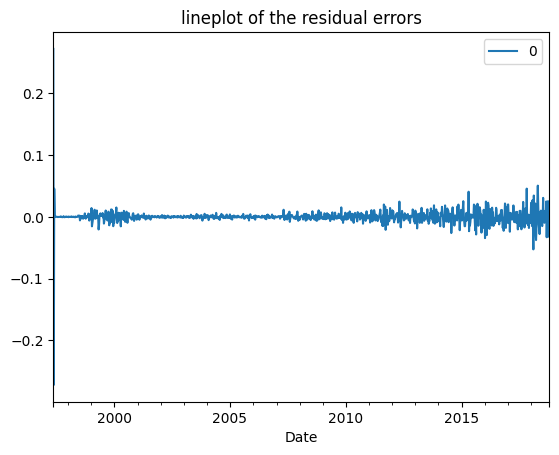

                 0
count  1119.000000
mean     -0.000012
std       0.014021
min      -0.271953
25%      -0.002583
50%      -0.000050
75%       0.002270
max       0.271781


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-46-1c12b5b86306>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



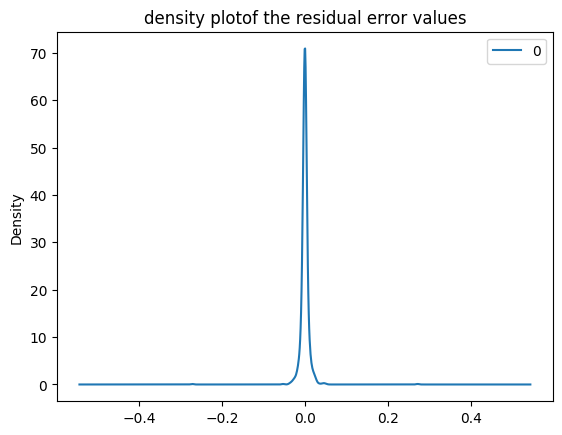

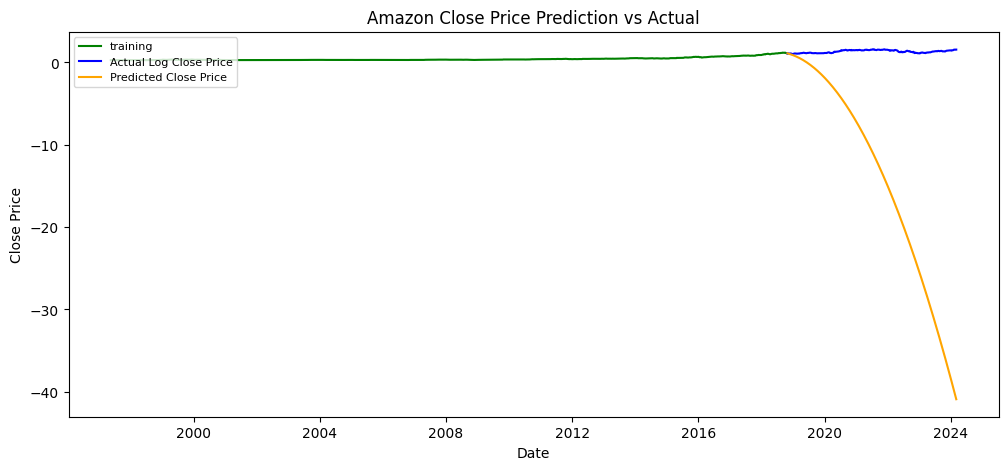

MSE: 386.4070735553462
MAE: 386.4070735553462
RMSE: 19.65723972370857
MAPE: 11.21331394503553


In [ ]:
#AMAZON -->> problemi!
model = ARIMA(amazon_train['Log Close'], order=(3,3,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #suggesting that they still be some trend information not captured by the model?
plt.title('lineplot of the residual errors')
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())

#forecast
fc = results.forecast(280, alpha=0.05)
amazon_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(amazon_train['Log Close'], color='green',label='training')
plt.plot(amazon_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(amazon_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('Amazon Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=amazon_test.index, y=amazon_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=amazon_test.index, y=amazon_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Amazon',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(amazon_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(amazon_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(amazon_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-amazon_test['Log Close'])/np.abs(amazon_test['Log Close']))
print('MAPE: '+str(mape))

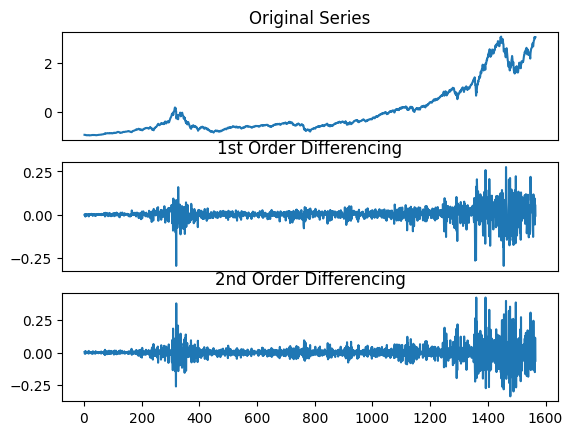

In [ ]:
#selection of d parameter for Nasdaq
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(nasdaq_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(nasdaq_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(nasdaq_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.985832672890455
p-value : 1.1442373011884268e-27
#Number of Lags Used : 6
Number of Observations Used : 1558
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.328809074578377
p-value : 1.1088612715842023e-26
#Number of Lags Used : 24
Number of Observations Used : 1539
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.150645120083966
p-value : 0.0007977806768564477
#Number of Lags Used : 16
Number of Observations Used : 1495
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.02823375636399
p-value : 1.6106144012385302e-17
#Number of Lags Used : 16
Number of Observations Used : 1494
Reject the null hypothesis. Data has no unit root and is stationary.


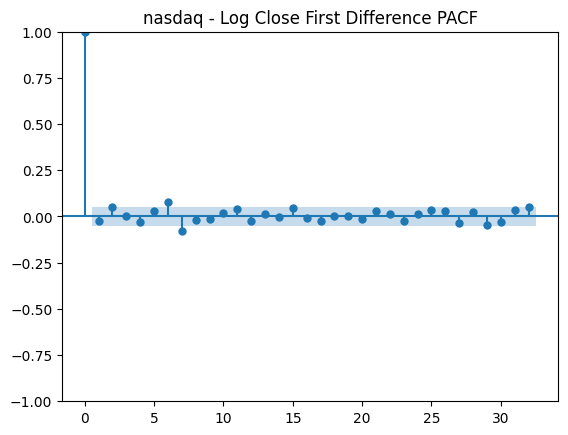

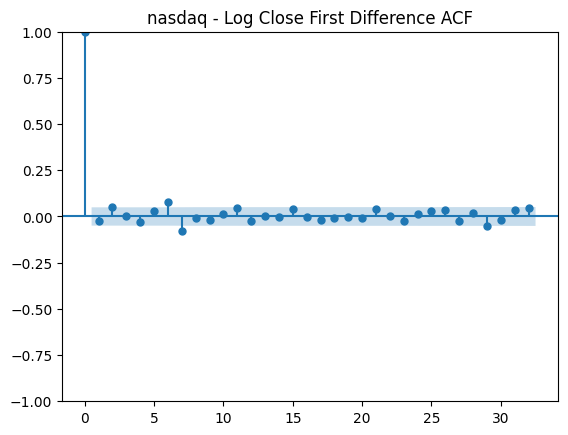

In [ ]:
#correzione esponenziale di nasdaq con il logaritmo
nasdaq_df['Log Close'] = np.log(nasdaq_df['Close']+1)

#indagine di p e q per nasdaq
nasdaq_df['Log Close First Difference'] = nasdaq_df['Log Close']- nasdaq_df['Log Close'].shift(1)
adf_check(nasdaq_df['Log Close First Difference'].dropna())

nasdaq_df['Log Close Second Difference'] = nasdaq_df['Log Close First Difference']- nasdaq_df['Log Close First Difference'].shift(1)
adf_check(nasdaq_df['Log Close Second Difference'].dropna())

nasdaq_df['Log Seasonal Difference'] = nasdaq_df['Log Close'] - nasdaq_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(nasdaq_df['Log Seasonal Difference'].dropna())

nasdaq_df['Seasonal First Difference'] = nasdaq_df['Log Close First Difference'] - nasdaq_df['Log Close First Difference'].shift(54)
adf_check(nasdaq_df['Seasonal First Difference'].dropna())


fig_first = plot_pacf(nasdaq_df['Log Close First Difference'].dropna(), title='nasdaq - Log Close First Difference PACF')
second_first = plot_acf(nasdaq_df['Log Close First Difference'].dropna(), title='nasdaq - Log Close First Difference ACF')

In [ ]:
train_size_nasdaq = int(len(sp500_df) * 0.8)  # 80% for training
nasdaq_train, nasdaq_test = nasdaq_df[:train_size_nasdaq], nasdaq_df[train_size_nasdaq:]
nasdaq_test.set_index('Date', inplace=True)
nasdaq_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood                2923.990
Date:                Fri, 12 Apr 2024   AIC                          -5839.981
Time:                        07:46:43   BIC                          -5819.457
Sample:                    03-06-1994   HQIC                         -5832.265
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0468      0.015     -3.132      0.002      -0.076      -0.018
ar.L2          0.0031      0.015      0.212      0.832      -0.026       0.032
ma.L1         -0.9957      0.003   -297.664      0.0

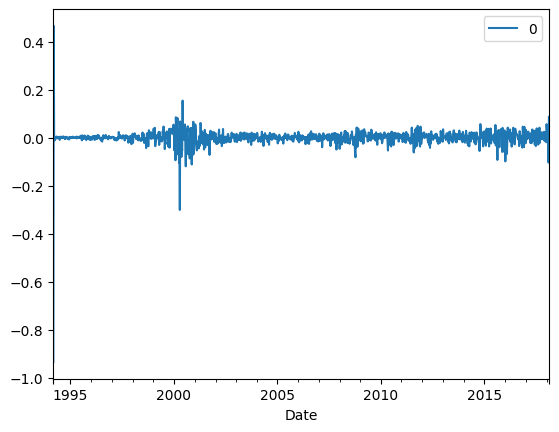

                 0
count  1252.000000
mean      0.000163
std       0.037572
min      -0.933145
25%      -0.008028
50%       0.001443
75%       0.012082
max       0.466219


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-50-3deb06708918>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



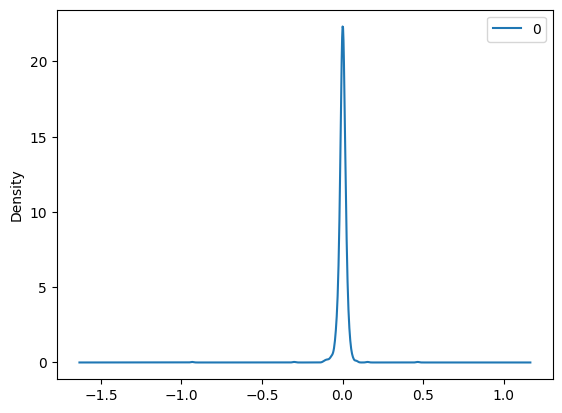

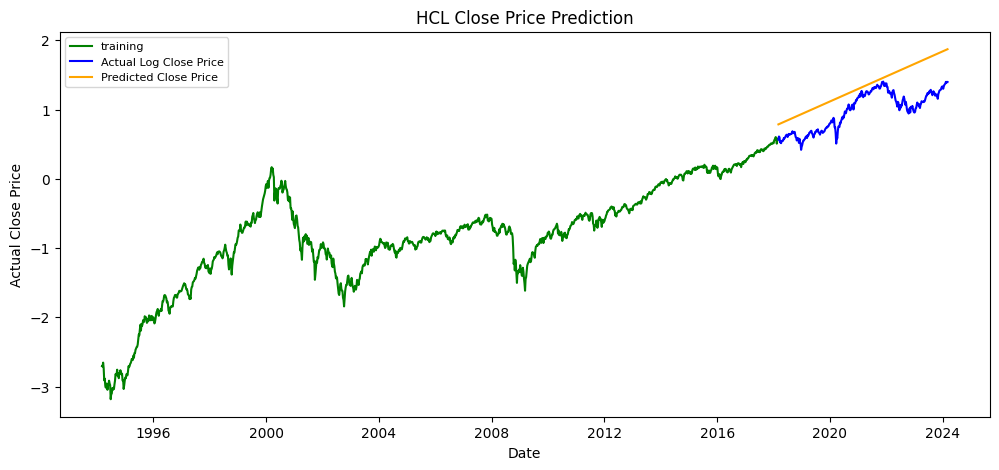

                 0
count  1252.000000
mean      0.000163
std       0.037572
min      -0.933145
25%      -0.008028
50%       0.001443
75%       0.012082
max       0.466219


<ipython-input-50-3deb06708918>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MSE: 0.1518669334016144
MAE: 0.1518669334016144
RMSE: 0.3897010821150159
MAPE: 0.39411679492731183


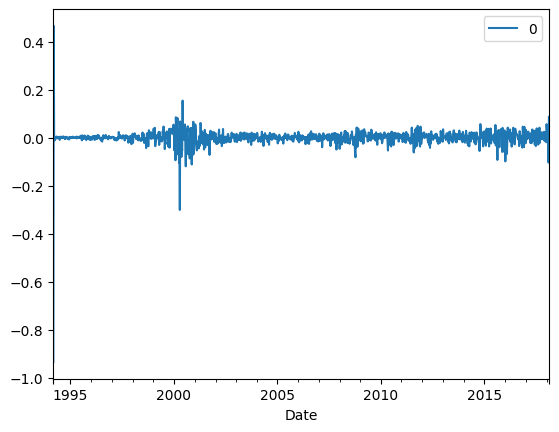

In [ ]:
#nasdaq
model = ARIMA(nasdaq_train['Close'], order=(2,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

nasdaq_df['Predicted Close'] = results.predict(start=nasdaq_train.index[0], end=nasdaq_train.index[-1], typ='levels')

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())
fc = results.forecast(314, alpha=0.05)
nasdaq_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(nasdaq_train['Log Close'], color='green',label='training')
plt.plot(nasdaq_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(nasdaq_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('HCL Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
print(residuals.describe())
nasdaq_test['Residual'] = nasdaq_test['Log Close'].iloc[2:] - nasdaq_test['Log Close'].iloc[2:]


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=nasdaq_test.index, y=nasdaq_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=nasdaq_test.index, y=nasdaq_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for nasdaq',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(nasdaq_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(nasdaq_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(nasdaq_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-nasdaq_test['Log Close'])/np.abs(nasdaq_test['Log Close']))
print('MAPE: '+str(mape))

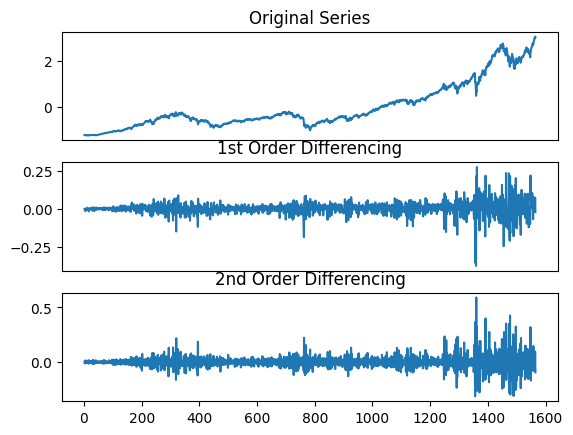

In [ ]:
#selection of d parameter for sp500
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(sp500_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(sp500_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(sp500_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.18366182641815
p-value : 2.217139474801136e-15
#Number of Lags Used : 20
Number of Observations Used : 1411
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -15.610073633649513
p-value : 1.7844143627609273e-28
#Number of Lags Used : 22
Number of Observations Used : 1408
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.492335264524583
p-value : 0.000203006672134582
#Number of Lags Used : 22
Number of Observations Used : 1356
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.391713097585546
p-value : 2.356957087079546e-13
#Number of Lags Used : 20
Number of Observations Used : 1357
Reject the null hypothesis. Data has no unit root and is stationary.


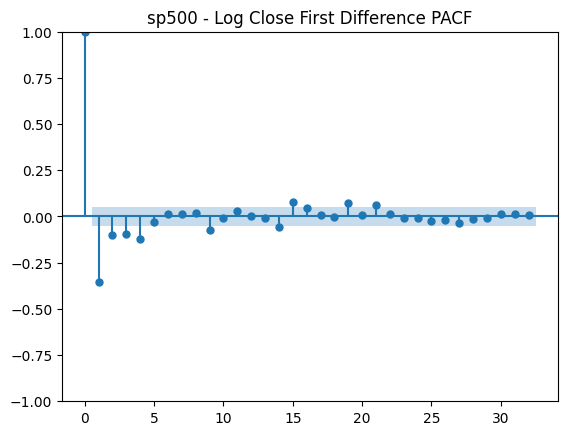

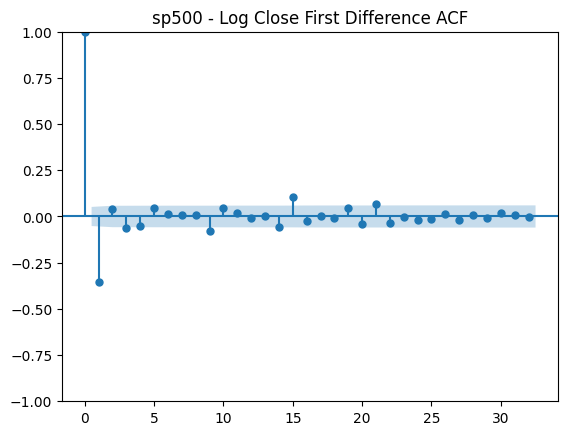

In [ ]:
#correzione esponenziale di sp500 con il logaritmo
sp500_df['Log Close'] = np.log(sp500_df['Close']+1)

#indagine di p e q per sp500
sp500_df['Log Close First Difference'] = sp500_df['Log Close']- sp500_df['Log Close'].shift(1)
adf_check(sp500_df['Log Close First Difference'].dropna())

sp500_df['Log Close Second Difference'] = sp500_df['Log Close First Difference']- sp500_df['Log Close First Difference'].shift(1)
adf_check(sp500_df['Log Close Second Difference'].dropna())

sp500_df['Log Seasonal Difference'] = sp500_df['Log Close'] - sp500_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(sp500_df['Log Seasonal Difference'].dropna())

sp500_df['Seasonal First Difference'] = sp500_df['Log Close First Difference'] - sp500_df['Log Close First Difference'].shift(54)
adf_check(sp500_df['Seasonal First Difference'].dropna())

fig_first = plot_pacf(sp500_df['Log Close First Difference'].dropna(), title='sp500 - Log Close First Difference PACF')
second_first = plot_acf(sp500_df['Log Close First Difference'].dropna(), title='sp500 - Log Close First Difference ACF')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(4, 1, 1)   Log Likelihood                2763.461
Date:                Fri, 12 Apr 2024   AIC                          -5514.922
Time:                        07:46:47   BIC                          -5484.132
Sample:                    03-06-1994   HQIC                         -5503.347
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0432      0.860     -0.050      0.960      -1.729       1.642
ar.L2          0.0225      0.076      0.295      0.768      -0.127       0.172
ar.L3         -0.0371      0.025     -1.466      0.1

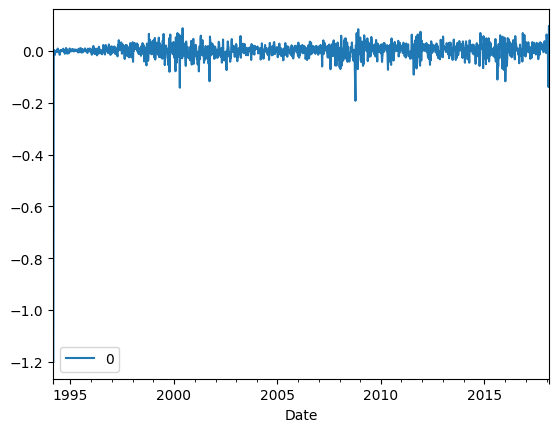

                 0
count  1252.000000
mean      0.000937
std       0.043099
min      -1.200693
25%      -0.011351
50%       0.003092
75%       0.016506
max       0.097334


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-53-128fe58f8fe1>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



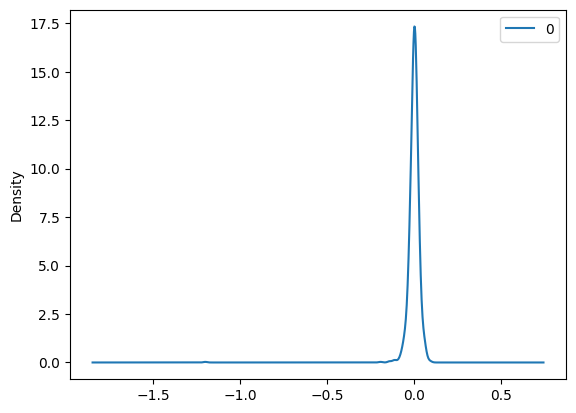

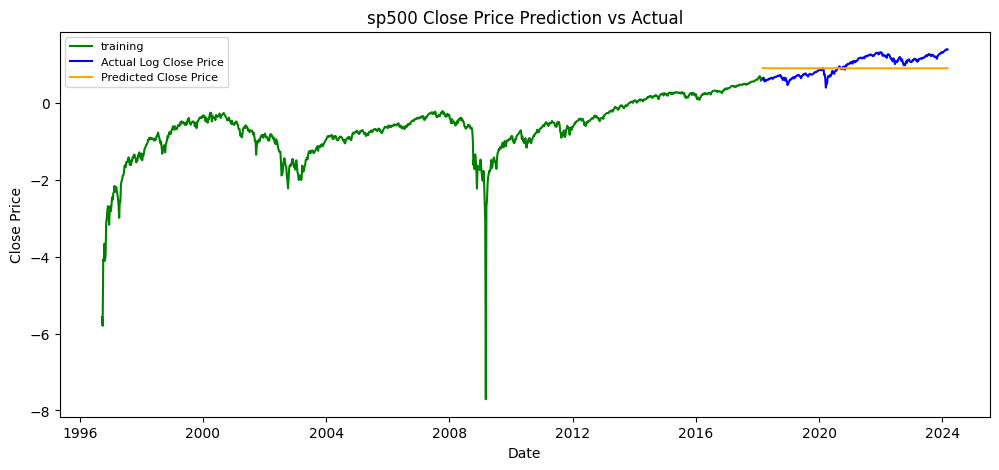

MSE: 0.06716249450931486
MAE: 0.06716249450931486
RMSE: 0.2591572775542197
MAPE: 0.25456000881926566


In [ ]:
#sp500

train_size_sp500 = int(len(sp500_df) * 0.8)  # 80% for training
sp500_train, sp500_test = sp500_df[:train_size_sp500], sp500_df[train_size_sp500:]
sp500_test.set_index('Date', inplace=True)
sp500_train.set_index('Date', inplace=True)
model = ARIMA(sp500_train['Close'], order=(4,1,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())

#forecast
fc = results.forecast(314, alpha=0.05)
sp500_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sp500_train['Log Close'], color='green',label='training')
plt.plot(sp500_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(sp500_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('sp500 Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=sp500_test.index, y=sp500_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=sp500_test.index, y=sp500_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for sp500',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(sp500_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(sp500_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(sp500_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-sp500_test['Log Close'])/np.abs(sp500_test['Log Close']))
print('MAPE: '+str(mape))

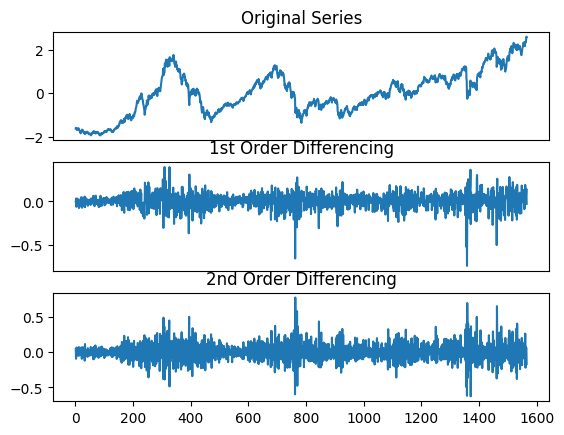

In [ ]:
#selection of d parameter for cac
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(cac_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(cac_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(cac_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.973303509547613
p-value : 2.744329705904774e-12
#Number of Lags Used : 22
Number of Observations Used : 1542
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.774528101993486
p-value : 1.2788901131954013e-29
#Number of Lags Used : 20
Number of Observations Used : 1543
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.4811941494130743
p-value : 0.008483409254403804
#Number of Lags Used : 24
Number of Observations Used : 1487
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.494046127137635
p-value : 1.2902069061651457e-13
#Number of Lags Used : 24
Number of Observations Used : 1486
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


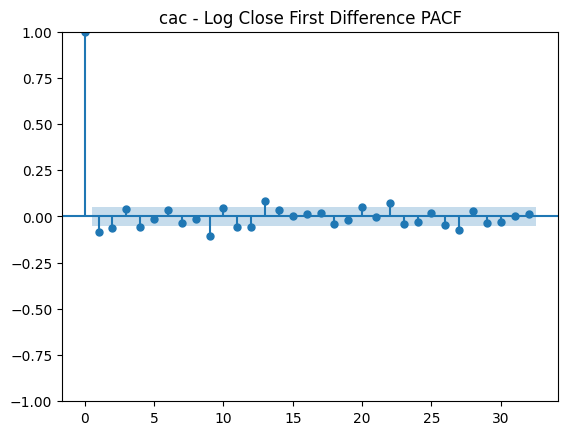

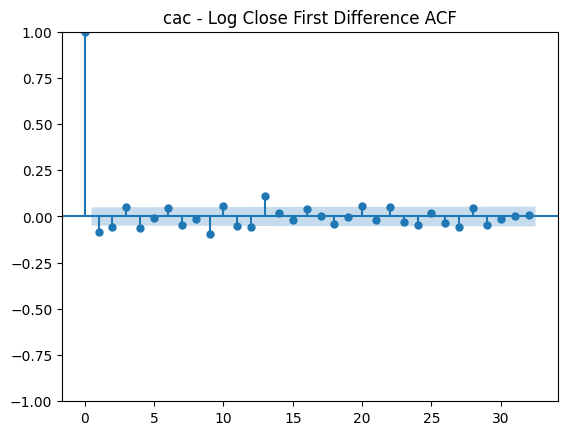

In [ ]:
#correzione esponenziale di cac con il logaritmo
cac_df['Log Close'] = np.log(cac_df['Close']+2)


#indagine di p e q per cac
cac_df['Log Close First Difference'] = cac_df['Log Close']- cac_df['Log Close'].shift(1)
adf_check(cac_df['Log Close First Difference'].dropna())

cac_df['Log Close Second Difference'] = cac_df['Log Close First Difference']- cac_df['Log Close First Difference'].shift(1)
adf_check(cac_df['Log Close Second Difference'].dropna())

cac_df['Log Seasonal Difference'] = cac_df['Log Close'] - cac_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(cac_df['Log Seasonal Difference'].dropna())

cac_df['Seasonal First Difference'] = cac_df['Log Close First Difference'] - cac_df['Log Close First Difference'].shift(54)
adf_check(cac_df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data:
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(cac_df['Log Close First Difference'].dropna(), title='cac - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(cac_df['Log Close First Difference'].dropna(), title='cac - Log Close First Difference ACF')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1327.527
Date:                Fri, 12 Apr 2024   AIC                          -2647.055
Time:                        07:46:50   BIC                          -2626.528
Sample:                    03-06-1994   HQIC                         -2639.338
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4965      3.419      0.145      0.885      -6.204       7.197
ma.L1         -0.5559      3.418     -0.163      0.871      -7.255       6.143
ma.L2          0.0253      0.213      0.119      0.9

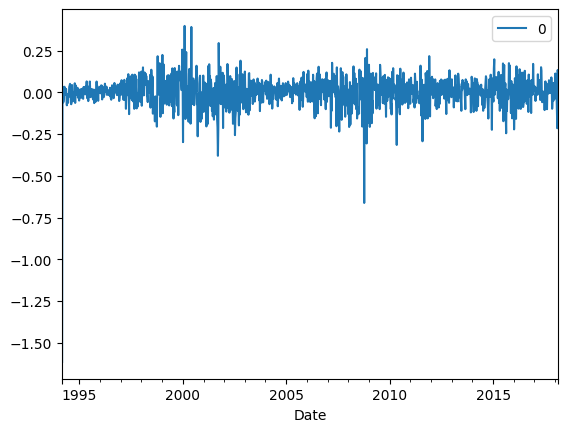

                 0
count  1252.000000
mean      0.000665
std       0.095381
min      -1.615668
25%      -0.042768
50%       0.008528
75%       0.052211
max       0.398347


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-56-e04ebc8a20a6>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



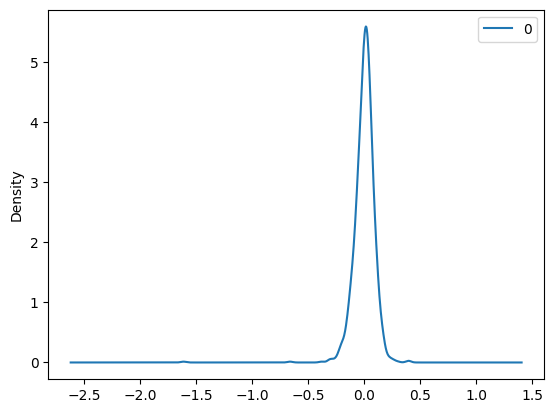

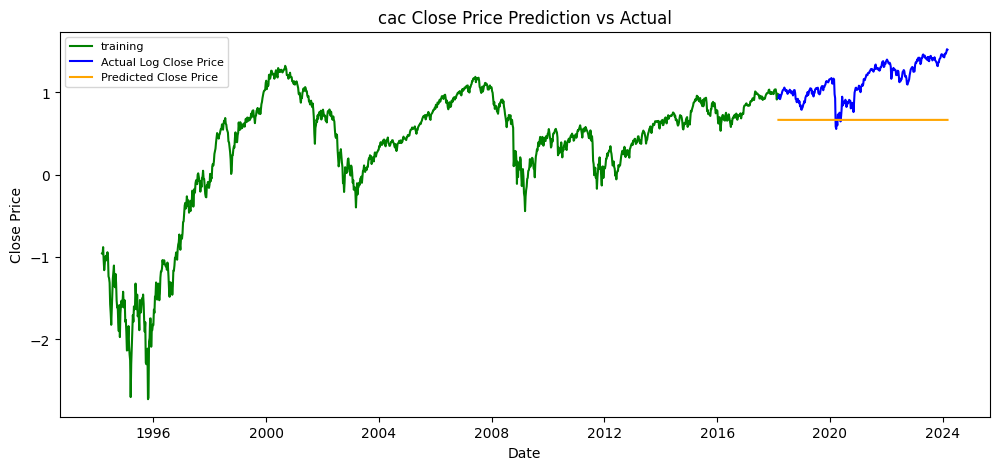

MSE: 0.2697856289173139
MAE: 0.2697856289173139
RMSE: 0.5194089226392957
MAPE: 0.3969730052720457


In [ ]:
#cac

train_size_cac = int(len(cac_df) * 0.8)  # 80% for training
cac_train, cac_test = cac_df[:train_size_cac], cac_df[train_size_cac:]
cac_test.set_index('Date', inplace=True)
cac_train.set_index('Date', inplace=True)

model = ARIMA(cac_train['Close'], order=(1,1,2)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())
fc = results.forecast(314, alpha=0.05)
cac_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cac_train['Log Close'], color='green',label='training')
plt.plot(cac_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(cac_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('cac Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=cac_test.index, y=cac_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=cac_test.index, y=cac_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Cac',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(cac_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(cac_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(cac_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-cac_test['Log Close'])/np.abs(cac_test['Log Close']))
print('MAPE: '+str(mape))

## LSTM

TAKE CARE!! Run the notebook ONLY including the cells before ARIMA and then come here.

https://www.diariodiunanalista.it/posts/previsione-delle-serie-temporali-con-lstm-in-tensorflow/

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM?ref=diariodiunanalista.it

In [36]:
pip install pandas_ta

In [37]:
import yfinance as yf
import pandas_ta as ta
import keras.models, keras.layers
import tensorflow as tf
import numpy as np

- ibm_df['RSI']=ta.rsi(ibm_df.Close, length=15): Here, the Relative Strength Index (RSI) indicator is being calculated for the ibm_df DataFrame. RSI is a momentum indicator that measures the speed and magnitude of price movements. It is calculated using the closing price (Close) data and specifying a length of 15 periods.
- ibm_df['EMAF']=ta.ema(ibm_df.Close, length=10): Here, the Exponential Moving Average (EMA) is being calculated for the ibm_df DataFrame. EMA is a trend indicator that assigns greater weight to more recent data. It is calculated using the closing price (Close) data and specifying a length of 20 periods.
- ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100): This line calculates another EMA, but with a length of 100 periods. This could be useful for identifying longer-term trends.
- ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150): Finally, this line calculates another EMA with a length of 150 periods. This provides an even longer-term indication of price trends.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

dataset = ibm_df

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.loc[0:train_size,:], dataset.loc[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
 model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
 model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

InvalidIndexError: (slice(0, 10, None), 0)

In [52]:
class G:
   WINDOW_SIZE = 10 #how many weeks do we consider for our prediction --> ask David!!
   BATCH_SIZE = 32 #how many item are we considering per batch
   SHUFFLE_BUFFER_SIZE = 1000 #this parameter helps to define the buffer used by TensorFlow

def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset


In [55]:
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)


ibm_df_set = ibm_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
X = np.array(ibm_df_set)
X_windowed = windowed_dataset(X)

#training and validation set
from sklearn.model_selection import train_test_split

# Assuming 'time' is your time series index
time_train, time_valid, series_train, series_valid = train_test_split(ibm_df_set.index, X, test_size=0.2)

In [60]:
def create_uncompiled_model():
    # definiamo un modello sequenziale
    model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(1),
    ])

    return model

def create_model():
    tf.random.set_seed(51)

    model = create_uncompiled_model()

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["mae"])
    return model

model = create_model()

# addestriamo per 20 epochs con e assegnamo la callback
history = model.fit(series_train, epochs=20)

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1152, in train_step
        self._validate_target_and_loss(y, loss)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1106, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=<keras.src.losses.Huber object at 0x7ad46c282ec0>, and therefore expects target data to be provided in `fit()`.


(1417, 9)
<class 'pandas.core.frame.DataFrame'>
Epoch 1/30
68/68 [==============================] - 6s 30ms/step - loss: 0.6927 - val_loss: 1.1360
Epoch 2/30
68/68 [==============================] - 1s 11ms/step - loss: 0.6442 - val_loss: 1.0049
Epoch 3/30
68/68 [==============================] - 1s 11ms/step - loss: 0.5940 - val_loss: 1.1774
Epoch 4/30
68/68 [==============================] - 1s 11ms/step - loss: 0.5733 - val_loss: 0.9575
Epoch 5/30
68/68 [==============================] - 1s 11ms/step - loss: 0.5687 - val_loss: 1.0450
Epoch 6/30
68/68 [==============================] - 1s 14ms/step - loss: 0.5558 - val_loss: 0.7217
Epoch 7/30
68/68 [==============================] - 1s 14ms/step - loss: 0.5410 - val_loss: 0.7556
Epoch 8/30
68/68 [==============================] - 1s 16ms/step - loss: 0.5395 - val_loss: 1.1696
Epoch 9/30
68/68 [==============================] - 1s 10ms/step - loss: 0.5231 - val_loss: 1.0760
Epoch 10/30
68/68 [==============================] - 1s 11ms/

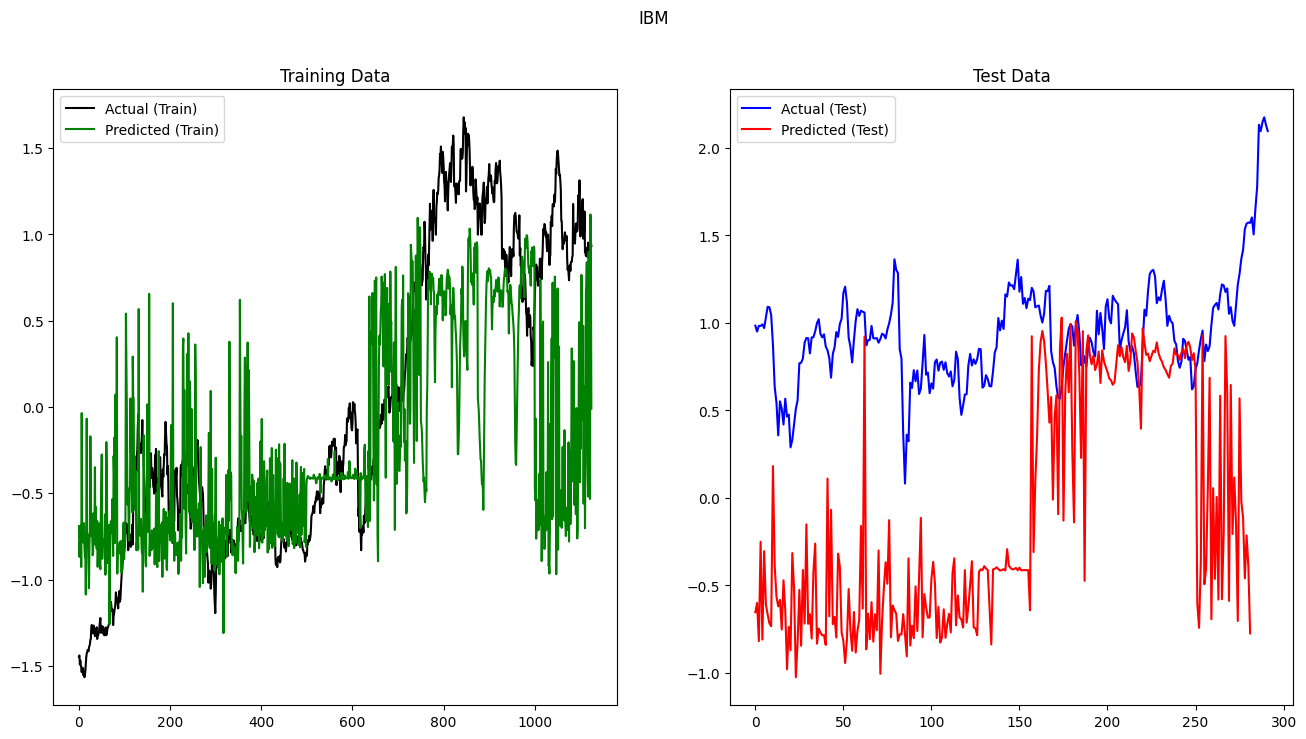

In [38]:
#IBM

# Adding indicators
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)


ibm_df_set = ibm_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]

ibm_df_set.head(10)
print(ibm_df_set.shape)
print(type(ibm_df_set))
#Target column Categories
Y =[1 if ibm_df.Open[i]<ibm_df.Close[i] else 0 for i in range(0, len(ibm_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [ibm_df.Close[i] for i in range(0, len(ibm_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 8 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, ibm_df_set.shape[0]):
        X[j].append(ibm_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('IBM')
plt.show()

In [45]:
X_test.shape

(282, 10, 9)

In [48]:
from sklearn.metrics import mean_squared_error
import math
#I have to fix the fact that the shape of y_test is 292 while the shape of y_pred is 282
mse = mean_squared_error(y_test[:282], y_pred)
rmse = math.sqrt(mse)

print("RMSE:", rmse)

RMSE: 1.2028834559085746


(1417, 9)
<class 'pandas.core.frame.DataFrame'>
Epoch 1/30
68/68 [==============================] - 5s 20ms/step - loss: 0.0282 - val_loss: 0.2997
Epoch 2/30
68/68 [==============================] - 1s 10ms/step - loss: 0.0087 - val_loss: 0.3177
Epoch 3/30
68/68 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.2788
Epoch 4/30
68/68 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.2908
Epoch 5/30
68/68 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.2753
Epoch 6/30
68/68 [==============================] - 1s 8ms/step - loss: 0.0084 - val_loss: 0.2752
Epoch 7/30
68/68 [==============================] - 1s 9ms/step - loss: 0.0082 - val_loss: 0.2886
Epoch 8/30
68/68 [==============================] - 1s 8ms/step - loss: 0.0081 - val_loss: 0.2731
Epoch 9/30
68/68 [==============================] - 1s 9ms/step - loss: 0.0084 - val_loss: 0.3165
Epoch 10/30
68/68 [==============================] - 1s 8ms/step - l

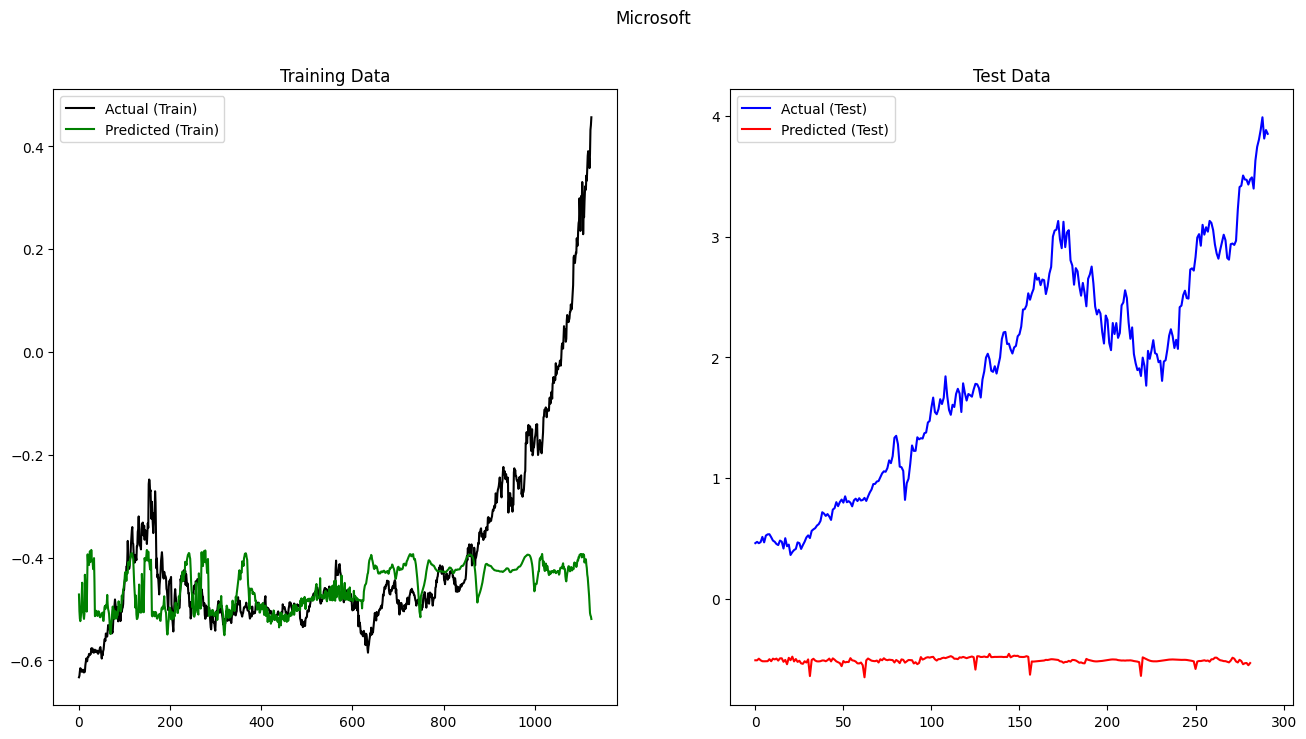

In [65]:
#Microsoft

# Adding indicators
microsoft_df['RSI']=ta.rsi(microsoft_df.Close, length=15)
microsoft_df['EMAF']=ta.ema(microsoft_df.Close, length=20)
microsoft_df['EMAM']=ta.ema(microsoft_df.Close, length=100)
microsoft_df['EMAS']=ta.ema(microsoft_df.Close, length=150)


microsoft_df.dropna(inplace=True)
microsoft_df.reset_index(inplace = True)
microsoft_df_set = microsoft_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

microsoft_df_set.head(10)
print(microsoft_df_set.shape)
print(type(microsoft_df_set))
#Target column Categories
Y =[1 if microsoft_df.Open[i]<microsoft_df.Close[i] else 0 for i in range(0, len(microsoft_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [microsoft_df.Close[i] for i in range(0, len(microsoft_df))] #on y, I have the close price

#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, microsoft_df_set.shape[0]):
        X[j].append(microsoft_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Microsoft')
plt.show()

In [ ]:
#amazon

# Adding indicators
amazon_df['RSI']=ta.rsi(amazon_df.Close, length=15)
amazon_df['EMAF']=ta.ema(amazon_df.Close, length=20)
amazon_df['EMAM']=ta.ema(amazon_df.Close, length=100)
amazon_df['EMAS']=ta.ema(amazon_df.Close, length=150)


amazon_df.dropna(inplace=True)
amazon_df.reset_index(inplace = True)
amazon_df_set = amazon_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

amazon_df_set.head(10)
print(amazon_df_set.shape)
print(type(amazon_df_set))
#Target column Categories
Y = [1 if amazon_df.Open[i]<amazon_df.Close[i] else 0 for i in range(0, len(amazon_df))]

y = [amazon_df.Close[i] for i in range(0, len(amazon_df))] #on yi, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, amazon_df_set.shape[0]):
        X[j].append(amazon_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Amazon')
plt.show()

(1417, 9)
<class 'pandas.core.frame.DataFrame'>
Epoch 1/30
68/68 [==============================] - 3s 13ms/step - loss: nan - val_loss: nan
Epoch 2/30
68/68 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 3/30
68/68 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 4/30
68/68 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 5/30
68/68 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 6/30
68/68 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 7/30
68/68 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 8/30
68/68 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 9/30
68/68 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 10/30
68/68 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 11/30
68/68 [===========

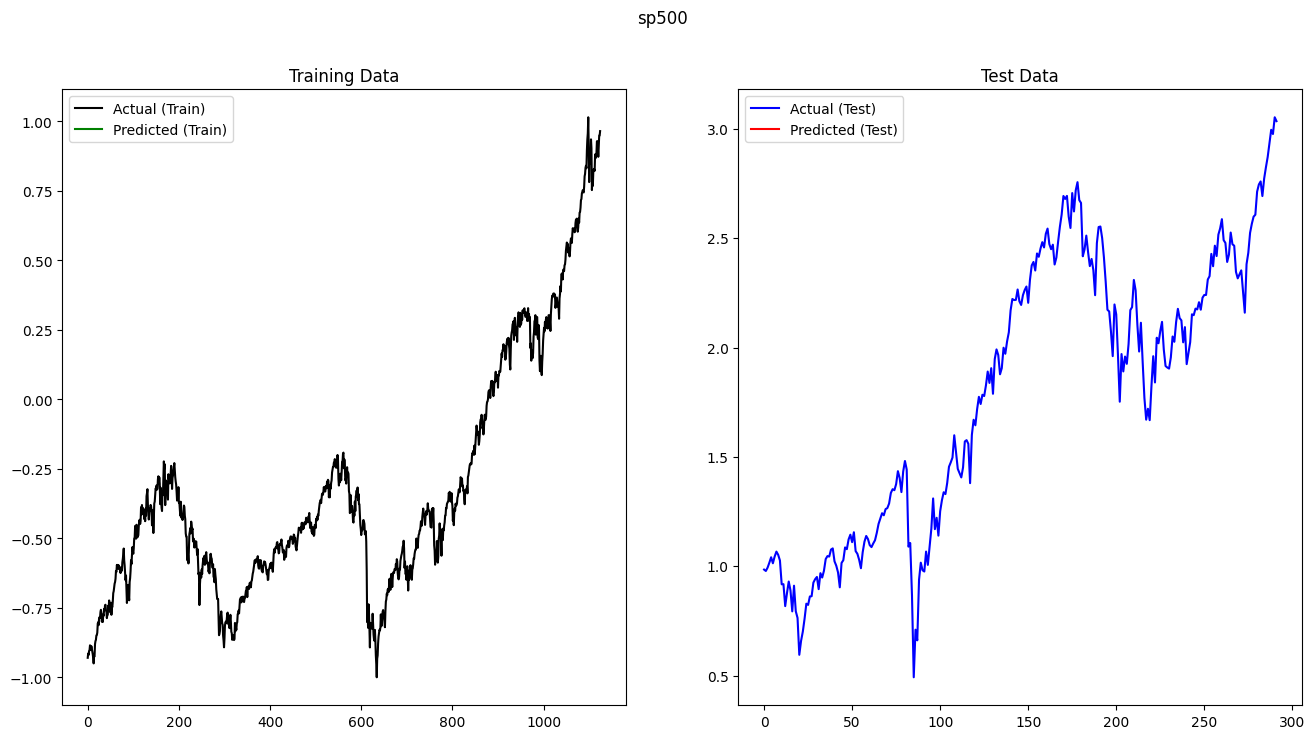

In [66]:
#sp500

# Adding indicators
sp500_df['RSI']=ta.rsi(sp500_df.Close, length=15)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)


sp500_df.dropna(inplace=True)
sp500_df.reset_index(inplace = True)
sp500_df_set = ibm_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

sp500_df_set.head(10)
print(sp500_df_set.shape)
print(type(sp500_df_set))
#Target column Categories
Y =[1 if sp500_df.Open[i]<sp500_df.Close[i] else 0 for i in range(0, len(sp500_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [sp500_df.Close[i] for i in range(0, len(sp500_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, sp500_df_set.shape[0]):
        X[j].append(sp500_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('sp500')
plt.show()

In [ ]:
#cac

# Adding indicators
cac_df['RSI']=ta.rsi(cac_df.Close, length=15)
cac_df['EMAF']=ta.ema(cac_df.Close, length=20)
cac_df['EMAM']=ta.ema(cac_df.Close, length=100)
cac_df['EMAS']=ta.ema(cac_df.Close, length=150)


cac_df.dropna(inplace=True)
cac_df.reset_index(inplace = True)
cac_df_set = cac_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

cac_df_set.head(10)
print(cac_df_set.shape)
print(type(cac_df_set))
#Target column Categories
Y =[1 if cac_df.Open[i]<cac_df.Close[i] else 0 for i in range(0, len(cac_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [cac_df.Close[i] for i in range(0, len(cac_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, cac_df_set.shape[0]):
        X[j].append(cac_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Cac')
plt.show()

In [ ]:
#nasdaq

# Adding indicators
nasdaq_df['RSI']=ta.rsi(nasdaq_df.Close, length=15)
nasdaq_df['EMAF']=ta.ema(nasdaq_df.Close, length=20)
nasdaq_df['EMAM']=ta.ema(nasdaq_df.Close, length=100)
nasdaq_df['EMAS']=ta.ema(nasdaq_df.Close, length=150)


nasdaq_df.dropna(inplace=True)
nasdaq_df.reset_index(inplace = True)
nasdaq_df_set = nasdaq_df.loc[:, [ 'Open', 'High', 'Low', 'Volume','Close', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

nasdaq_df_set.head(10)
print(nasdaq_df_set.shape)
print(type(nasdaq_df_set))
#Target column Categories
Y =[1 if nasdaq_df.Open[i]<nasdaq_df.Close[i] else 0 for i in range(0, len(nasdaq_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [nasdaq_df.Close[i] for i in range(0, len(nasdaq_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, nasdaq_df_set.shape[0]):
        X[j].append(nasdaq_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('nasdaq')
plt.show()

In [ ]:
STOP

#SYSTEMATIC TRAINING MODEL
- Considering VIX
- if MA10>MA50 --> Output 1
- if MA50>MA -->

In [ ]:
#SYSTEMATIC TRAINING MODEL


In [ ]:
##example of fuzzy logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define fuzzy membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['high'])
#RNN HERE
# Define control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

# Pass inputs to the control system
fan_speed_ctrl.input['temperature'] = 10
fan_speed_ctrl.input['humidity'] = 80

# Compute the output
fan_speed_ctrl.compute()

# Print the output
print("Fan Speed:", fan_speed_ctrl.output['fan_speed'])


## ANFIS

prova